# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Helper functions

In [89]:
def calculate_ticks(ax, ticks, round_to=0.1, center=False):
    upperbound = np.ceil(ax.get_ybound()[1]/round_to)
    lowerbound = np.floor(ax.get_ybound()[0]/round_to)
    dy = upperbound - lowerbound
    fit = np.floor(dy/(ticks - 1)) + 1
    dy_new = (ticks - 1)*fit
    if center:
        offset = np.floor((dy_new - dy)/2)
        lowerbound = lowerbound - offset
    values = np.linspace(lowerbound, lowerbound + dy_new, ticks)
    return values*round_to

# Get data

In [3]:
sensor1 = pd.read_excel('TSPD04ESY01801451_20230322_140502.xlsx')
sensor2 = pd.read_excel('TSPD04ESY01802042_20230322_140502.xlsx')
sensor3 = pd.read_excel('TSPD04ESY01802105_20230322_140502.xlsx')

# Quick Look at the Data

## Oxygen Concentrator 1

In [4]:
sensor1.head(5)

,batl,deploymentGroupId,tsmEv,tsmGw,tsmId,tsmTs,tsmTuid,Unnamed: 7,accx,accy,...,histogram2,histogram3,histogram4,histogram5,histogram6,tsmEv.3,tsmGw.3,tsmId.3,tsmTs.3,tsmTuid.3
0,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678160e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
1,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678181e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
2,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678203e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
3,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678224e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451
4,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900417,1110.0,1.678246e+09,TSPD04ESY01801451,NaN,6.0,61.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900417,16100.0,1.677433e+09,TSPD04ESY01801451


In [5]:
sensor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 62 non-null     float64
 1   deploymentGroupId    62 non-null     object 
 2   tsmEv                62 non-null     float64
 3   tsmGw                62 non-null     object 
 4   tsmId                62 non-null     float64
 5   tsmTs                62 non-null     float64
 6   tsmTuid              62 non-null     object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

## Oxygen Concentrator 2

In [6]:
sensor2.head(5)

,batl,deploymentGroupId,tsmEv,tsmGw,tsmId,tsmTs,tsmTuid,Unnamed: 7,accx,accy,...,histogram2,histogram3,histogram4,histogram5,histogram6,tsmEv.3,tsmGw.3,tsmId.3,tsmTs.3,tsmTuid.3
0,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900094,1110.0,1.678149e+09,TSPD04ESY01802042,NaN,-19.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.677449e+09,TSPD04ESY01802042
1,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900094,1110.0,1.678171e+09,TSPD04ESY01802042,NaN,-19.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.677449e+09,TSPD04ESY01802042
2,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900094,1110.0,1.678192e+09,TSPD04ESY01802042,NaN,-19.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.677449e+09,TSPD04ESY01802042
3,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900094,1110.0,1.678214e+09,TSPD04ESY01802042,NaN,-19.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.677449e+09,TSPD04ESY01802042
4,94.0,prno00kirkenes0oxygendevices,10.0,TSGW01ETR02900094,1110.0,1.678235e+09,TSPD04ESY01802042,NaN,-19.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.677449e+09,TSPD04ESY01802042


In [7]:
sensor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71817 entries, 0 to 71816
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 62 non-null     float64
 1   deploymentGroupId    62 non-null     object 
 2   tsmEv                62 non-null     float64
 3   tsmGw                62 non-null     object 
 4   tsmId                62 non-null     float64
 5   tsmTs                62 non-null     float64
 6   tsmTuid              62 non-null     object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 40000 non-null  float64
 9   accy                 40000 non-null  float64
 10  accz                 40000 non-null  float64
 11  deploymentGroupId.1  40000 non-null  object 
 12  tsmEv.1              40000 non-null  float64
 13  tsmGw.1              40000 non-null  object 
 14  tsmId.1              40000 non-null  float64
 15  tsmTs.1              40000 non-null 

## Oxygen Concentrator 3

In [8]:
sensor3.head(5)

,batl,deploymentGroupId,tsmEv,tsmGw,tsmId,tsmTs,tsmTuid,Unnamed: 7,accx,accy,...,histogram2,histogram3,histogram4,histogram5,histogram6,tsmEv.3,tsmGw.3,tsmId.3,tsmTs.3,tsmTuid.3
0,91.0,prno00kirkenes0oxygendevices,10.0,TSGW01ES991500495,1110.0,1.675122e+09,TSPD04ESY01802105,NaN,-998.0,40.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ES991500495,16100.0,1.677449e+09,TSPD04ESY01802105
1,91.0,prno00kirkenes0oxygendevices,10.0,TSGW01ES991500495,1110.0,1.675144e+09,TSPD04ESY01802105,NaN,-998.0,40.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ES991500495,16100.0,1.677449e+09,TSPD04ESY01802105
2,91.0,prno00kirkenes0oxygendevices,10.0,TSGW01ES991500495,1110.0,1.675165e+09,TSPD04ESY01802105,NaN,-998.0,40.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ES991500495,16100.0,1.677449e+09,TSPD04ESY01802105
3,91.0,prno00kirkenes0oxygendevices,10.0,TSGW01ES991500495,1110.0,1.675187e+09,TSPD04ESY01802105,NaN,-998.0,40.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ES991500495,16100.0,1.677449e+09,TSPD04ESY01802105
4,91.0,prno00kirkenes0oxygendevices,10.0,TSGW01ES991500495,1110.0,1.675187e+09,TSPD04ESY01802105,NaN,-998.0,40.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ES991500495,16100.0,1.677449e+09,TSPD04ESY01802105


In [9]:
sensor3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72636 entries, 0 to 72635
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 249 non-null    float64
 1   deploymentGroupId    249 non-null    object 
 2   tsmEv                249 non-null    float64
 3   tsmGw                249 non-null    object 
 4   tsmId                249 non-null    float64
 5   tsmTs                249 non-null    float64
 6   tsmTuid              249 non-null    object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

#### Any of sensors has temp value of null?


In [10]:
print(sensor1['temp'].isna().sum())
print(sensor2['temp'].isna().sum())
print(sensor3['temp'].isna().sum())

0
0
0


# Datetimes

In [11]:
datetime1 = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.2']]
datetime2 = [datetime.datetime.fromtimestamp(x) for x in sensor2['tsmTs.2']]
datetime3 = [datetime.datetime.fromtimestamp(x) for x in sensor3['tsmTs.2']]


datetime1_histo = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.3'][:34000]]

In [12]:
batl1_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs'][: 62]]
batl2_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor2['tsmTs'][: 62]]
batl3_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor3['tsmTs'][: 62]]

In [13]:
acc1_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.1'][: 41000]]
acc2_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor2['tsmTs.1'][: 40000]]
acc3_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor3['tsmTs.1'][: 41000]]

In [14]:
temp1_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.2']]
temp2_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor2['tsmTs.2']]
temp3_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor3['tsmTs.2']]

In [15]:
actlv1_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.3'][: 34000]]
actlv2_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor2['tsmTs.3'][: 34000]]
actlv3_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor3['tsmTs.3'][: 34000]]

# Visualization

## Visualize battery levels

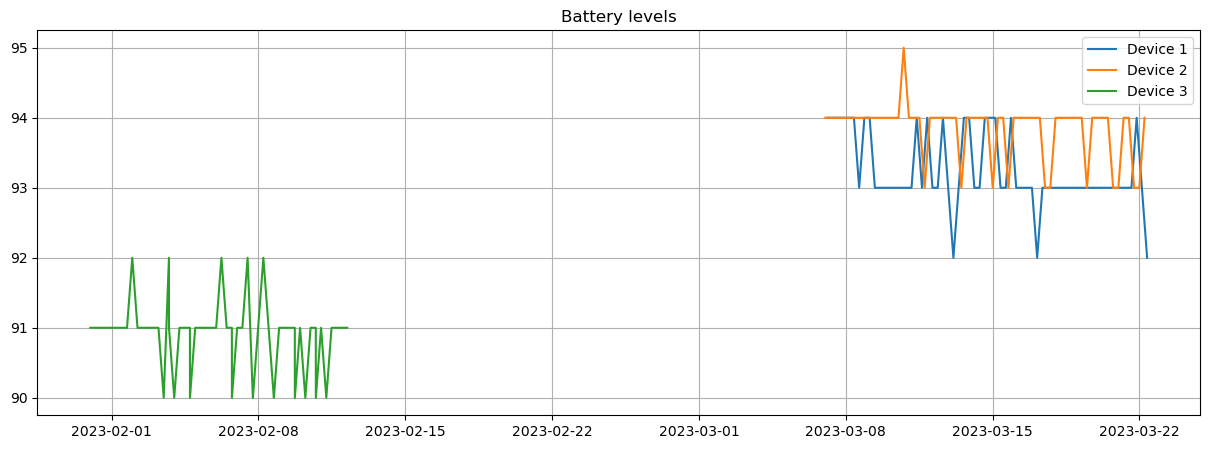

In [16]:
plt.figure(figsize=(15,5))

plt.title("Battery levels")
plt.plot(batl1_datetime, sensor1.batl[:62], label='Device 1')
plt.plot(batl2_datetime, sensor2.batl[:62], label='Device 2')
plt.plot(batl3_datetime, sensor3.batl[:62], label='Device 3')

plt.grid(True)
plt.legend()
plt.show()

## Visualize temperatures

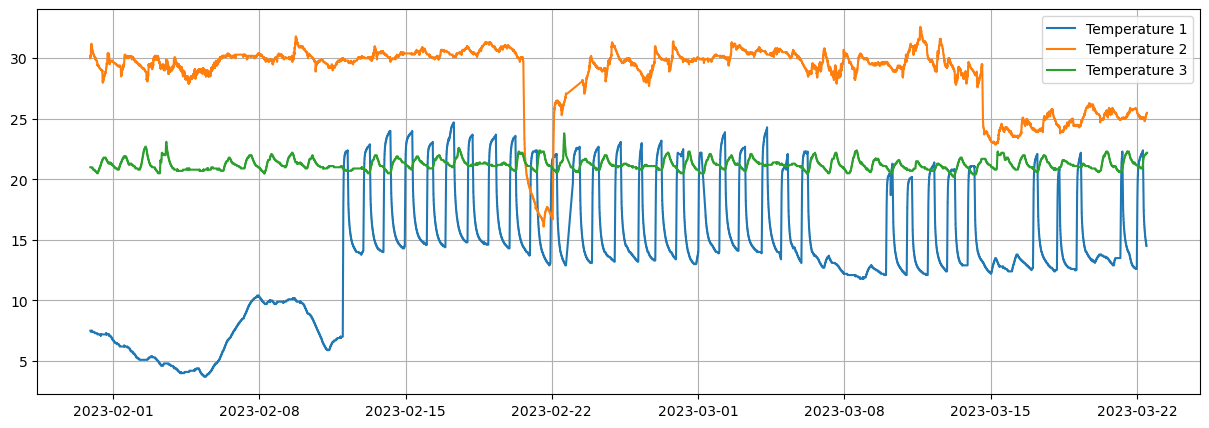

In [17]:
plt.figure(figsize=(15,5))

plt.plot(temp1_datetime, sensor1.temp, label='Temperature 1')
plt.plot(temp2_datetime, sensor2.temp, label='Temperature 2')
plt.plot(temp3_datetime, sensor3.temp, label='Temperature 3')


plt.grid(True)
plt.legend()
plt.show()

## Visualize Activity-level

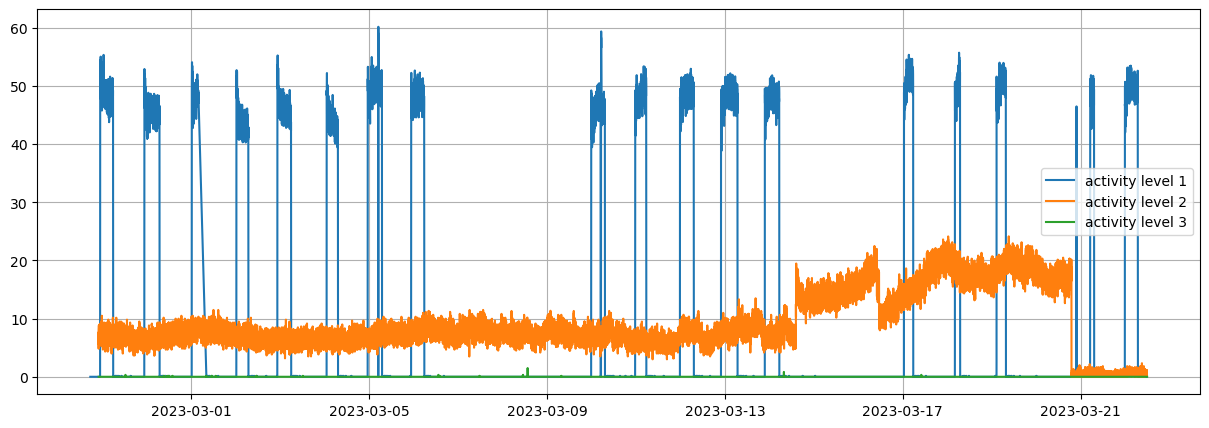

In [18]:
plt.figure(figsize=(15,5))


plt.plot(actlv1_datetime, sensor1.activityLevel[:34000], label='activity level 1')
plt.plot(actlv2_datetime, sensor2.activityLevel[:34000], label='activity level 2')
plt.plot(actlv3_datetime, sensor3.activityLevel[:34000], label='activity level 3')

plt.grid(True)
plt.legend()
plt.show()

## Visualize air-pressure

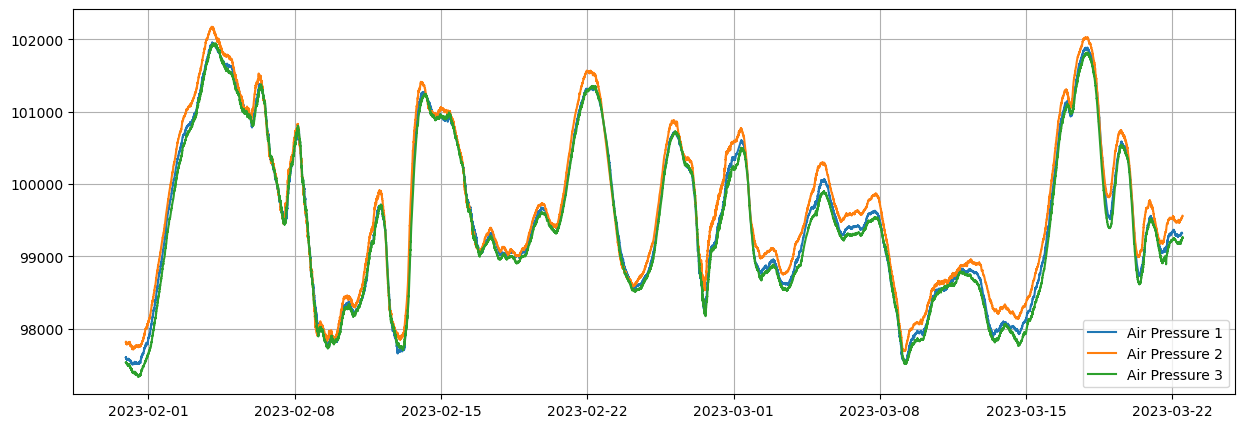

In [19]:
plt.figure(figsize=(15,5))

plt.plot(temp1_datetime, sensor1.airp, label='Air Pressure 1') 
plt.plot(temp2_datetime, sensor2.airp, label='Air Pressure 2') 
plt.plot(temp3_datetime, sensor3.airp, label='Air Pressure 3') 

plt.grid(True)
plt.legend()
plt.show()

## Temp vs humidity sensor-1

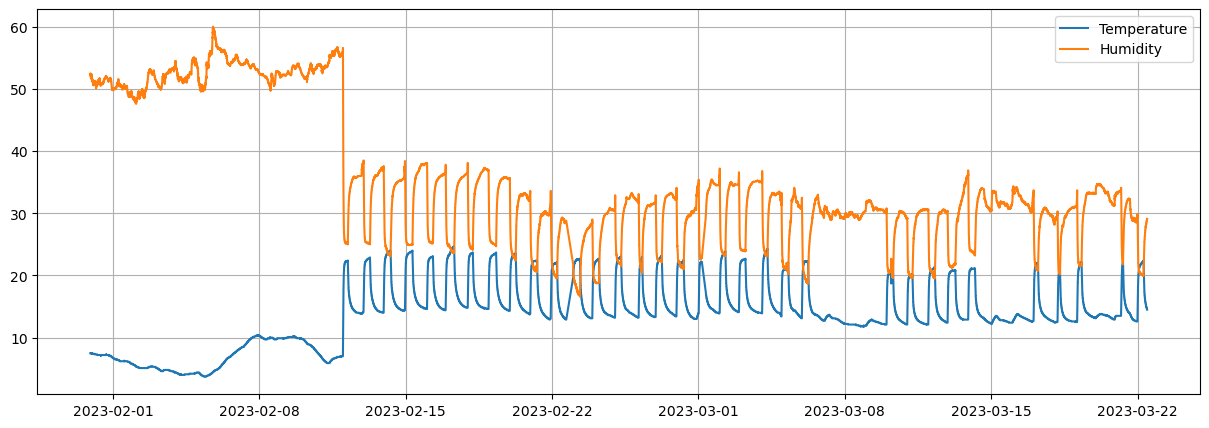

In [20]:
plt.figure(figsize=(15,5))

plt.plot(temp1_datetime, sensor1.temp, label='Temperature')
plt.plot(temp1_datetime, sensor1.humd, label='Humidity')


plt.grid(True)
plt.legend()
plt.show()

## Temp vs humidity sensor-1 different y axes

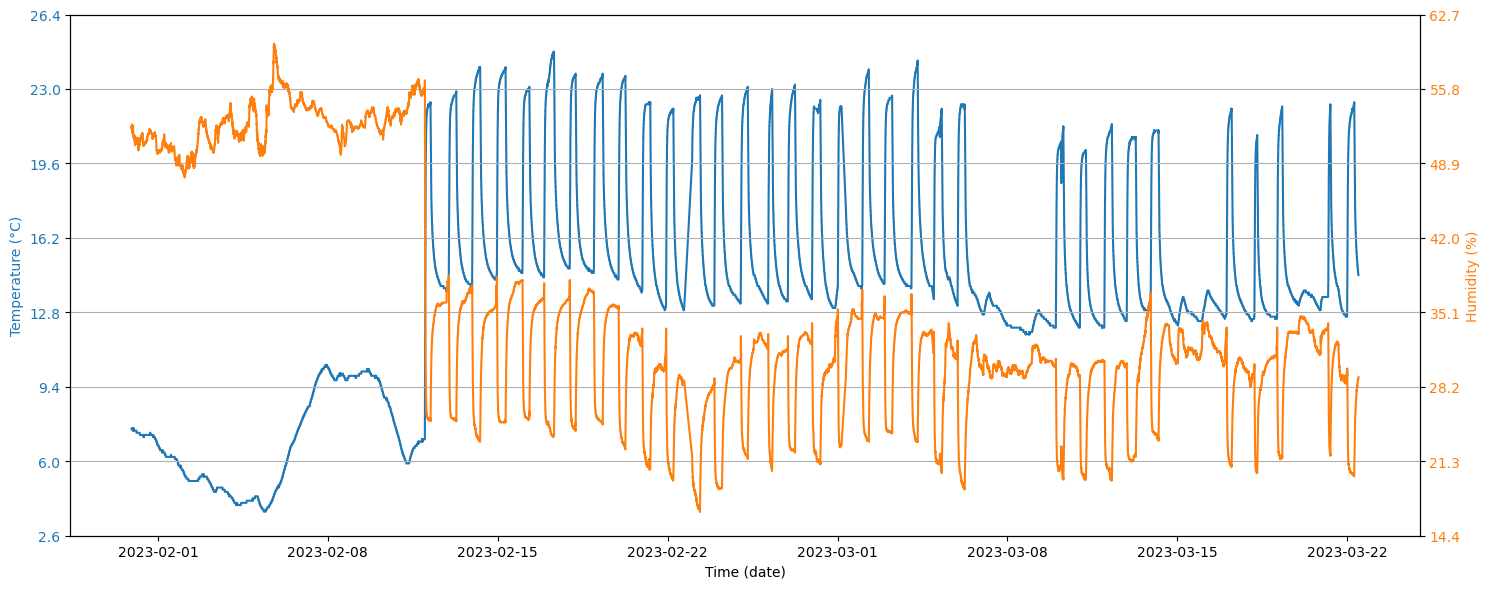

In [97]:
fig1, ax1_1 = plt.subplots()
fig1.set_figheight(6)
fig1.set_figwidth(15)

color = 'tab:blue'
ax1_1.set_xlabel('Time (date)')
ax1_1.set_ylabel('Temperature (°C)', color=color)
ax1_1.plot(temp1_datetime, sensor1.temp, color=color, label="Temperature")
ax1_1.tick_params(axis='y', labelcolor=color)

ax1_2 = ax1_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax1_2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
ax1_2.plot(temp1_datetime, sensor1.humd, color=color, label="Humidity")
ax1_2.tick_params(axis='y', labelcolor=color)

ax1_grid_lines = 8
ax1_1.set_yticks(calculate_ticks(ax1_1, ax1_grid_lines))
ax1_2.set_yticks(calculate_ticks(ax1_2, ax1_grid_lines))

fig1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
# fig1.legend(loc='upper right', ncol=1,  bbox_to_anchor=(0.94, 0.97))
plt.show()

## Temp vs activity-level sensor-1 different y axes

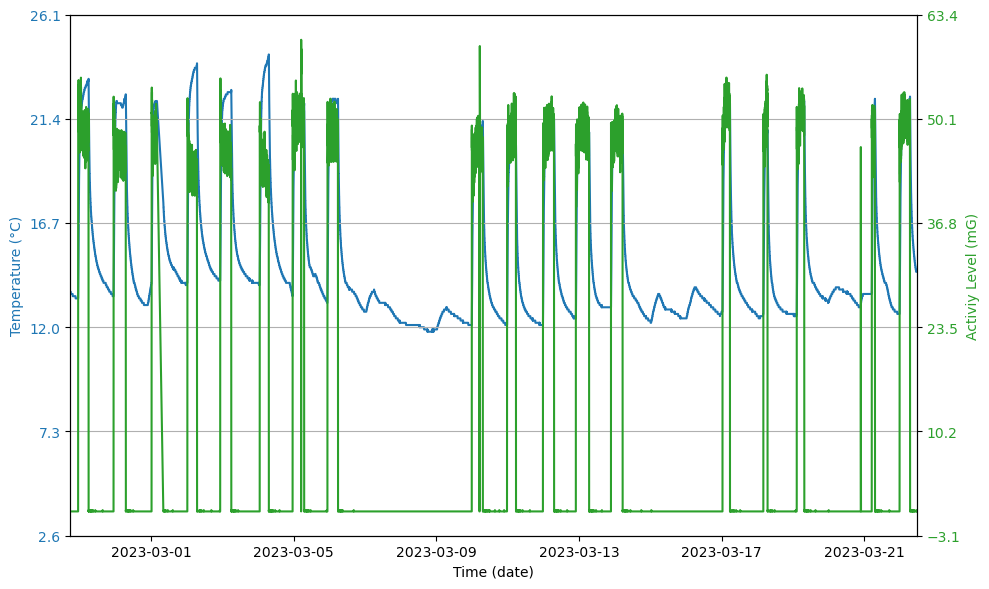

In [100]:
t_al1, t_al_ax1_1 = plt.subplots()
t_al1.set_figheight(6)
t_al1.set_figwidth(10)

color = 'tab:blue'
t_al_ax1_1.set_xlabel('Time (date)')
t_al_ax1_1.set_ylabel('Temperature (°C)', color=color)
t_al_ax1_1.plot(temp1_datetime, sensor1.temp, color=color, label="Temperature")
t_al_ax1_1.tick_params(axis='y', labelcolor=color)

t_al_ax1_2 = t_al_ax1_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
t_al_ax1_2.set_ylabel('Activiy Level (mG)', color=color)  # we already handled the x-label with ax1
t_al_ax1_2.plot(actlv1_datetime, sensor1.activityLevel[:34000], color=color, label="Activiy Level")
t_al_ax1_2.tick_params(axis='y', labelcolor=color)

t_al_ax1_grid_lines = 6
t_al_ax1_1.set_yticks(calculate_ticks(t_al_ax1_1, t_al_ax1_grid_lines))
t_al_ax1_2.set_yticks(calculate_ticks(t_al_ax1_2, t_al_ax1_grid_lines))

plt.xlim(actlv1_datetime[0], actlv1_datetime[-1])
t_al1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
# t_al1.legend(loc='upper right', ncol=1,  bbox_to_anchor=(0.94, 0.97))
plt.show()

## Temp vs histogram0 sensor 1

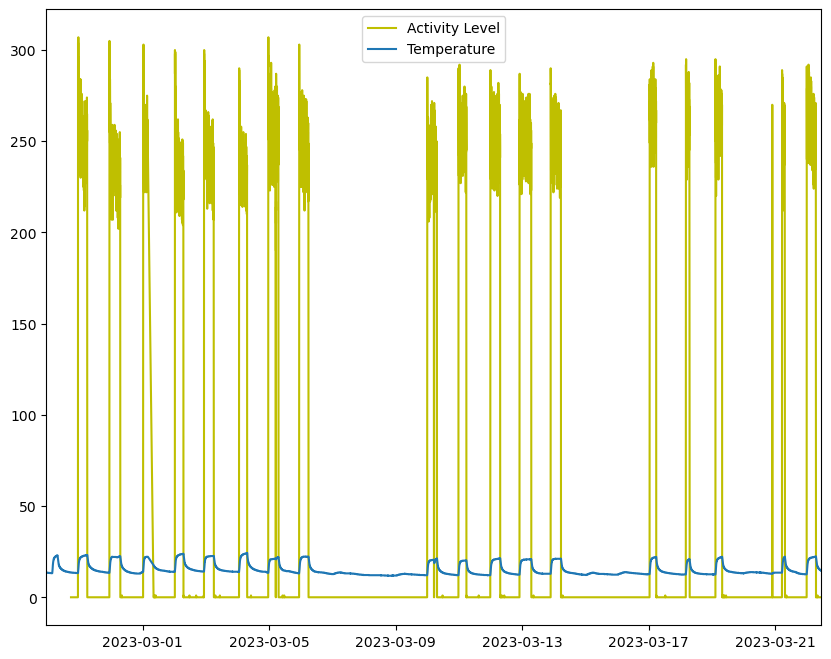

In [23]:
plt.figure(figsize=(10,8))

sensor1_actlv1_datetime = [datetime.datetime.fromtimestamp(x) for x in sensor1['tsmTs.2']]
sensor1_copy = sensor1[['tsmTs.3', 'histogram0', 'temp']][:34000]


plt.plot(actlv1_datetime, sensor1_copy.histogram0 , label="Activity Level", c='y')
plt.plot(sensor1_actlv1_datetime, sensor1.temp, label='Temperature')

# uncomment the following line to zoom in on y-axis
# plt.ylim(5, 30)
plt.xlim(sensor1_actlv1_datetime[37000], sensor1_actlv1_datetime[-1])

# plt.grid(True)
plt.legend()


plt.show()

## Temp vs humidity sensor-2

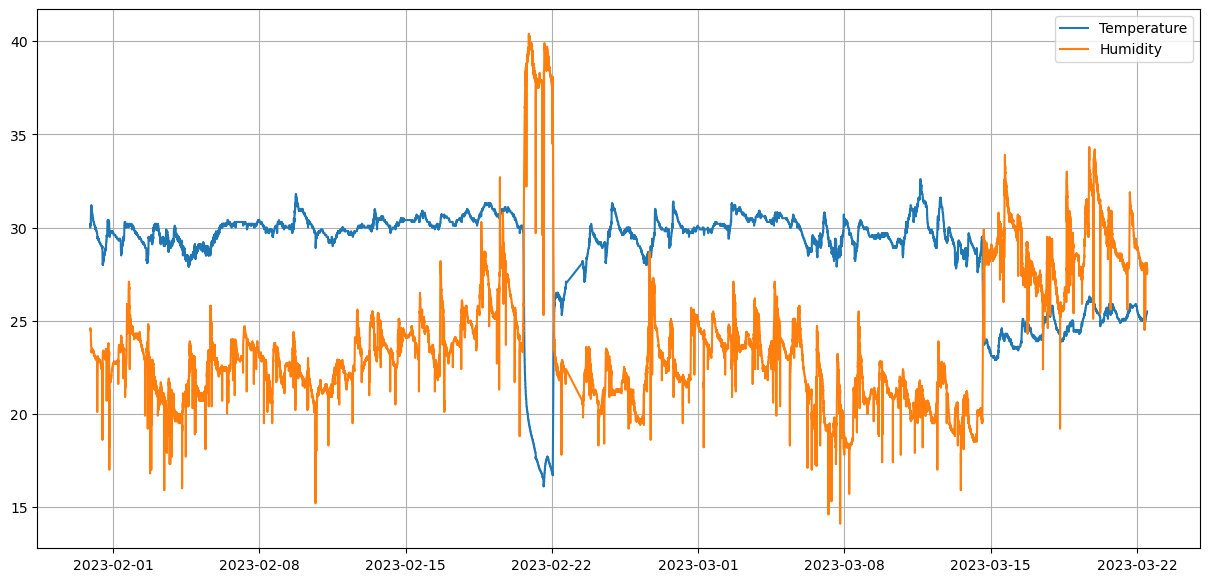

In [24]:
plt.figure(figsize=(15,7))

plt.plot(temp2_datetime, sensor2.temp, label='Temperature')
plt.plot(temp2_datetime, sensor2.humd, label='Humidity')


plt.grid(True)
plt.legend()
plt.show()

## Temp vs humidity sensor-2 different y axes

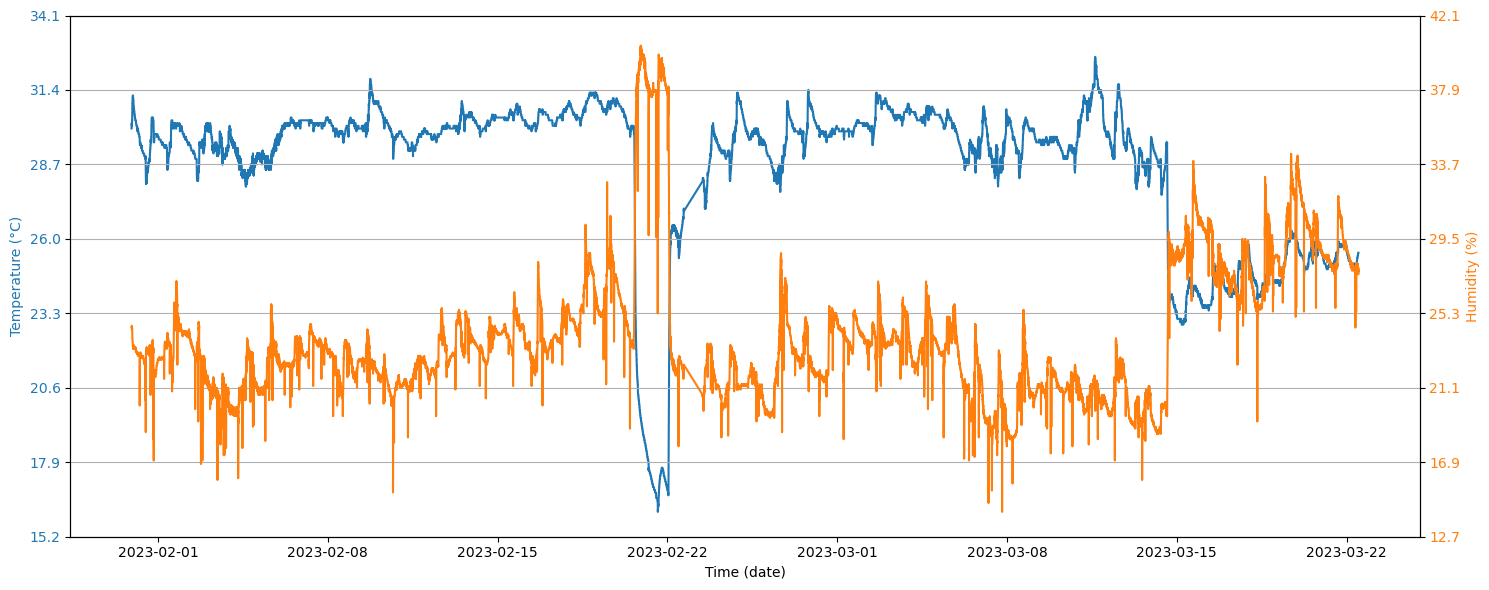

In [101]:
fig2, ax2_1 = plt.subplots()
fig2.set_figheight(6)
fig2.set_figwidth(15)

color = 'tab:blue'
ax2_1.set_xlabel('Time (date)')
ax2_1.set_ylabel('Temperature (°C)', color=color)
ax2_1.plot(temp2_datetime, sensor2.temp, color=color, label="Temperature")
ax2_1.tick_params(axis='y', labelcolor=color)

ax2_2 = ax2_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2_2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
ax2_2.plot(temp2_datetime, sensor2.humd, color=color, label="Humidity")
ax2_2.tick_params(axis='y', labelcolor=color)

ax2_grid_lines = 8
ax2_1.set_yticks(calculate_ticks(ax2_1, ax2_grid_lines))
ax2_2.set_yticks(calculate_ticks(ax2_2, ax2_grid_lines))

fig2.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
# fig2.legend(loc='upper right', ncol=1,  bbox_to_anchor=(0.94, 0.97))
plt.show()

## Temp vs humidity sensor-3

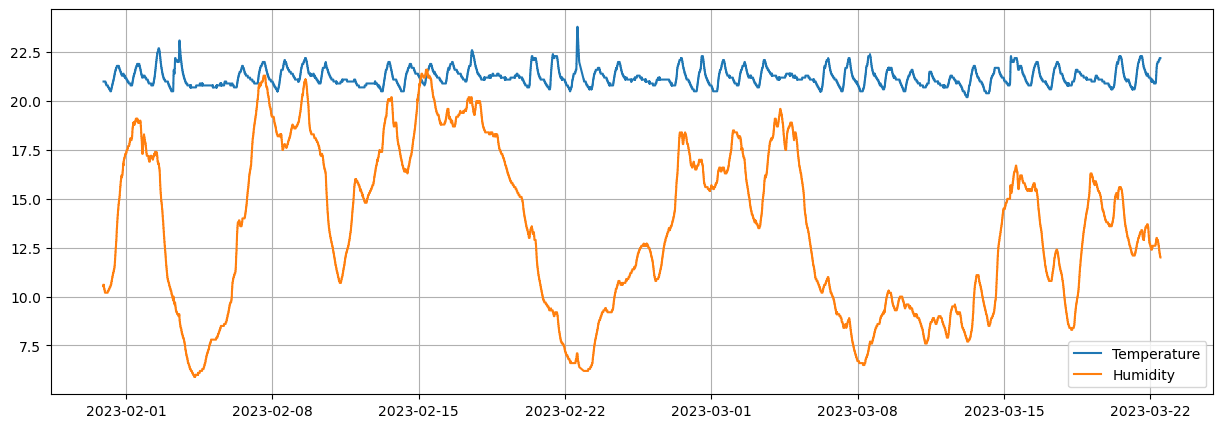

In [26]:
plt.figure(figsize=(15,5))

plt.plot(temp3_datetime, sensor3.temp, label='Temperature')
plt.plot(temp3_datetime, sensor3.humd, label='Humidity')


plt.grid(True)
plt.legend()
plt.show()

## Temp vs humidity sensor-3 different y axes

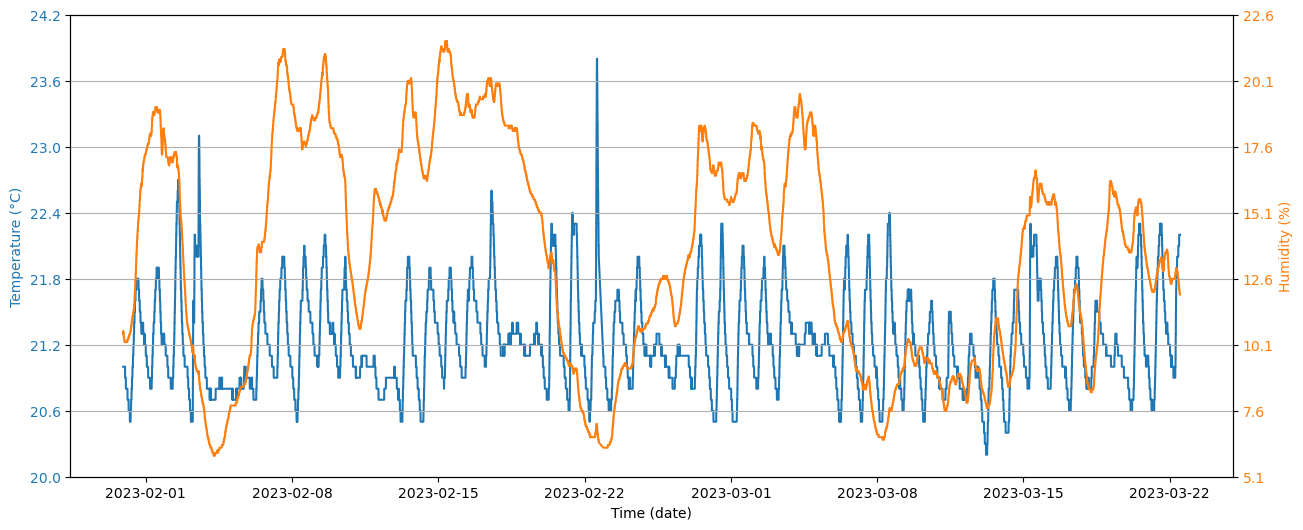

In [103]:
fig3, ax3_1 = plt.subplots()
fig3.set_figheight(6)
fig3.set_figwidth(15)

color = 'tab:blue'
ax3_1.set_xlabel('Time (date)')
ax3_1.set_ylabel('Temperature (°C)', color=color)
ax3_1.plot(temp3_datetime, sensor3.temp, color=color, label="Temperature")
ax3_1.tick_params(axis='y', labelcolor=color)

ax3_2 = ax3_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax3_2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
ax3_2.plot(temp3_datetime, sensor3.humd, color=color, label="Humidity")
ax3_2.tick_params(axis='y', labelcolor=color)

ax3_grid_lines = 8
ax3_1.set_yticks(calculate_ticks(ax3_1, ax3_grid_lines))
ax3_2.set_yticks(calculate_ticks(ax3_2, ax3_grid_lines))

fig1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
# fig1.legend(loc='upper right', ncol=1,  bbox_to_anchor=(0.94, 0.97))
plt.show()

## Visualize acceleration in sensor-1

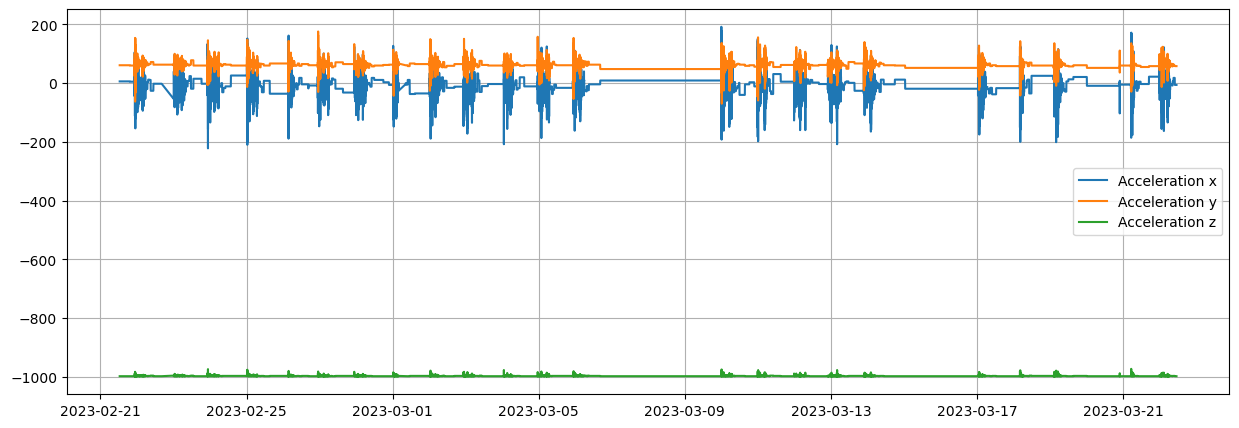

In [28]:
plt.figure(figsize=(15,5))

plt.plot(acc1_datetime, sensor1.accx[:41000], label='Acceleration x')
plt.plot(acc1_datetime, sensor1.accy[:41000], label='Acceleration y')
plt.plot(acc1_datetime, sensor1.accz[:41000], label='Acceleration z')


plt.grid(True)
plt.legend()
plt.show()

## Visualize acceleration in sensor-2

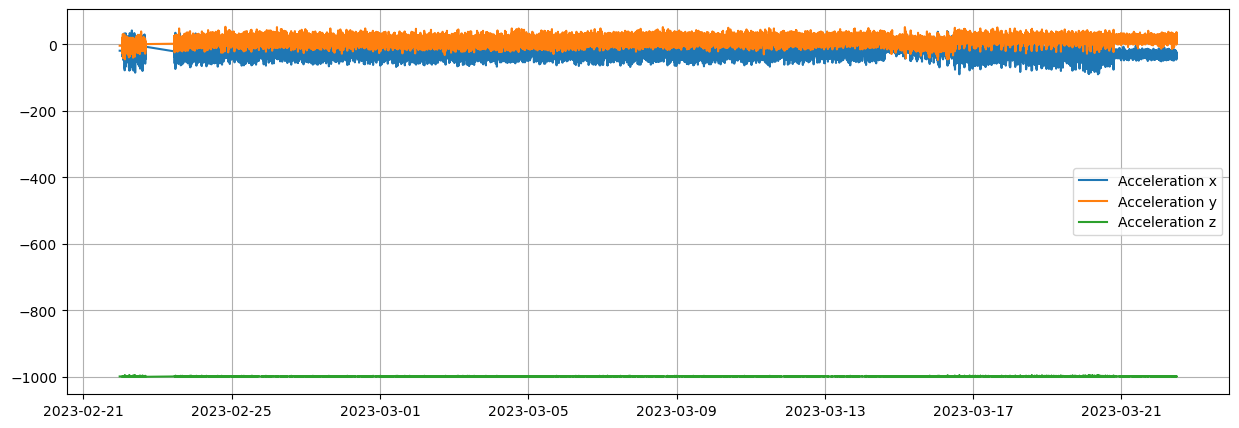

In [29]:
plt.figure(figsize=(15,5))

plt.plot(acc2_datetime, sensor2.accx[:40000], label='Acceleration x')
plt.plot(acc2_datetime, sensor2.accy[:40000], label='Acceleration y')
plt.plot(acc2_datetime, sensor2.accz[:40000], label='Acceleration z')


plt.grid(True)
plt.legend()
plt.show()

## Visualize acceleration in sensor-3

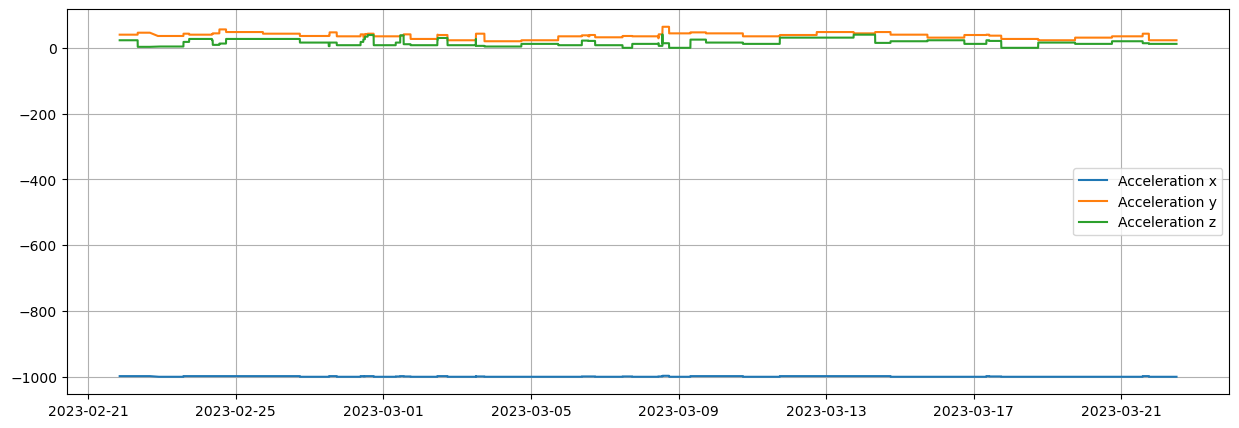

In [30]:
plt.figure(figsize=(15,5))

plt.plot(acc3_datetime, sensor3.accx[:41000], label='Acceleration x')
plt.plot(acc3_datetime, sensor3.accy[:41000], label='Acceleration y')
plt.plot(acc3_datetime, sensor3.accz[:41000], label='Acceleration z')


plt.grid(True)
plt.legend()
plt.show()

## Investigating the waves in OC-1

Investigate waves in the first sensor/apparatus to understand the resone beyond waves! <br/>
Taking one wave as an example, e.g. 19th of Feb and zooming in:<br/>

<br/>
we find that the device was on during night and went off at the morning

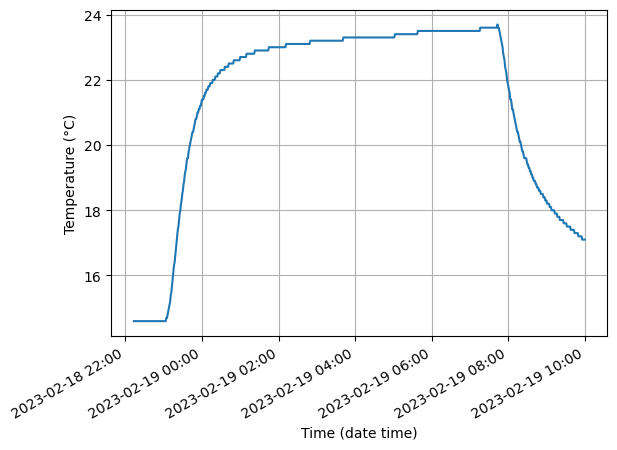

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(temp1_datetime[27340:28050], sensor1.temp[27340:28050])

# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.xlabel('Time (date time)')
plt.ylabel('Temperature (°C)')

plt.grid(True)

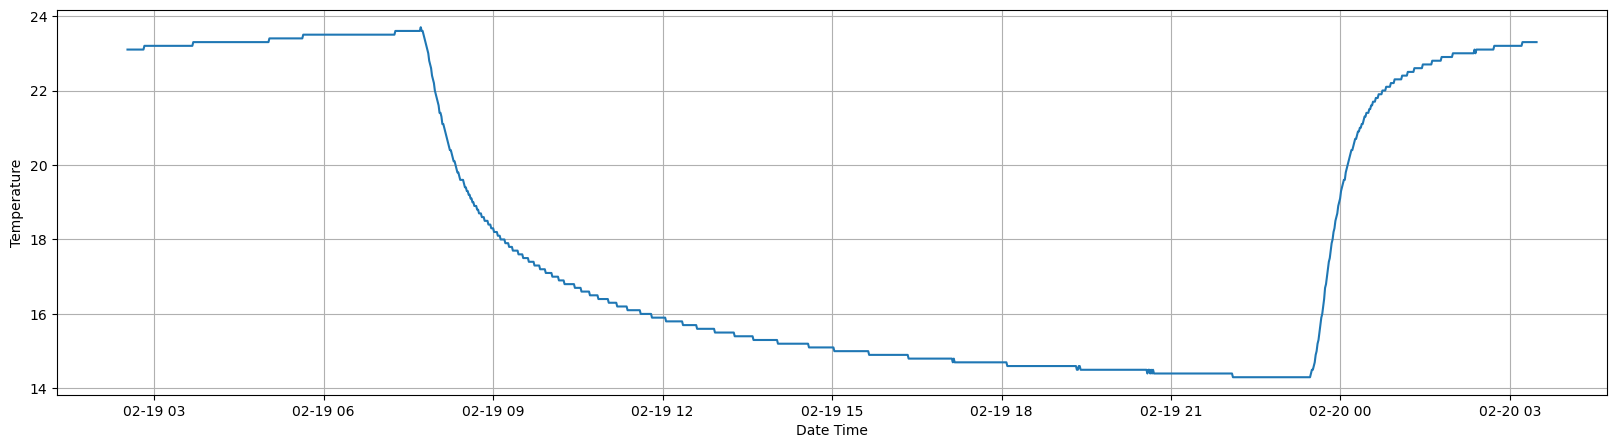

In [32]:
plt.figure(figsize=(20, 5))

plt.plot(temp1_datetime[27600:29100], sensor1.temp[27600:29100]) 

plt.xlabel("Date Time")
plt.ylabel("Temperature")

plt.grid(True)
plt.show()

# Visualize correlation section

In [33]:
import seaborn as sns

### correlation between feature sensor-1

<AxesSubplot:>

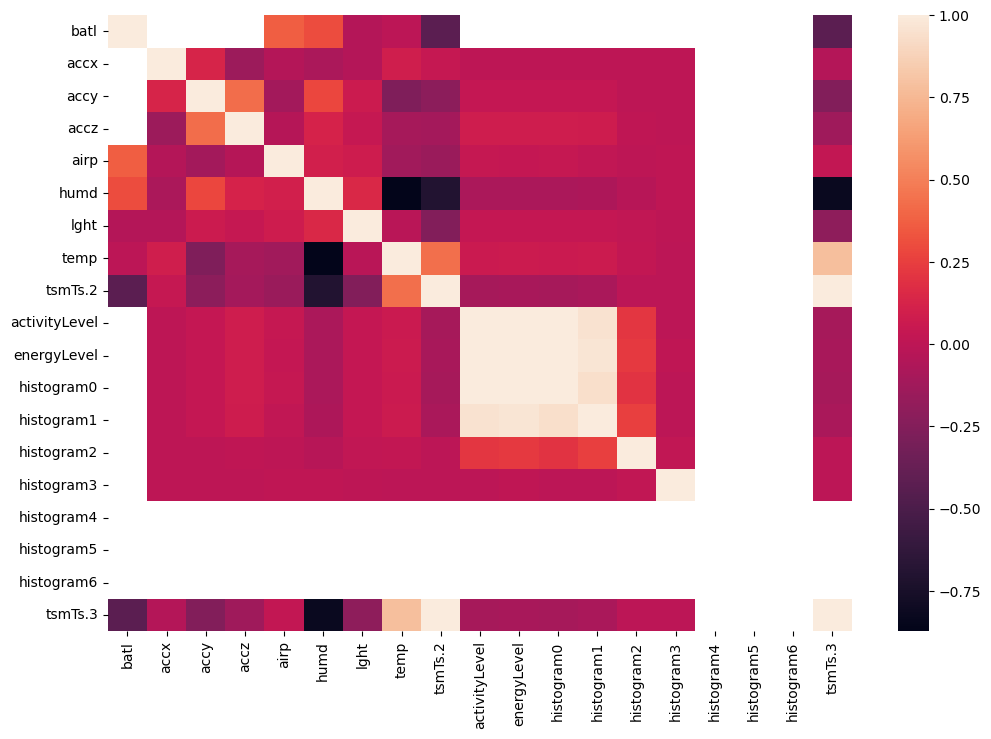

In [34]:
plt.figure(figsize=(12, 8))

copy1 = sensor1.copy()
copy1 = copy1.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3'
])

corr = copy1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## correlation between feature sensor-2

<AxesSubplot:>

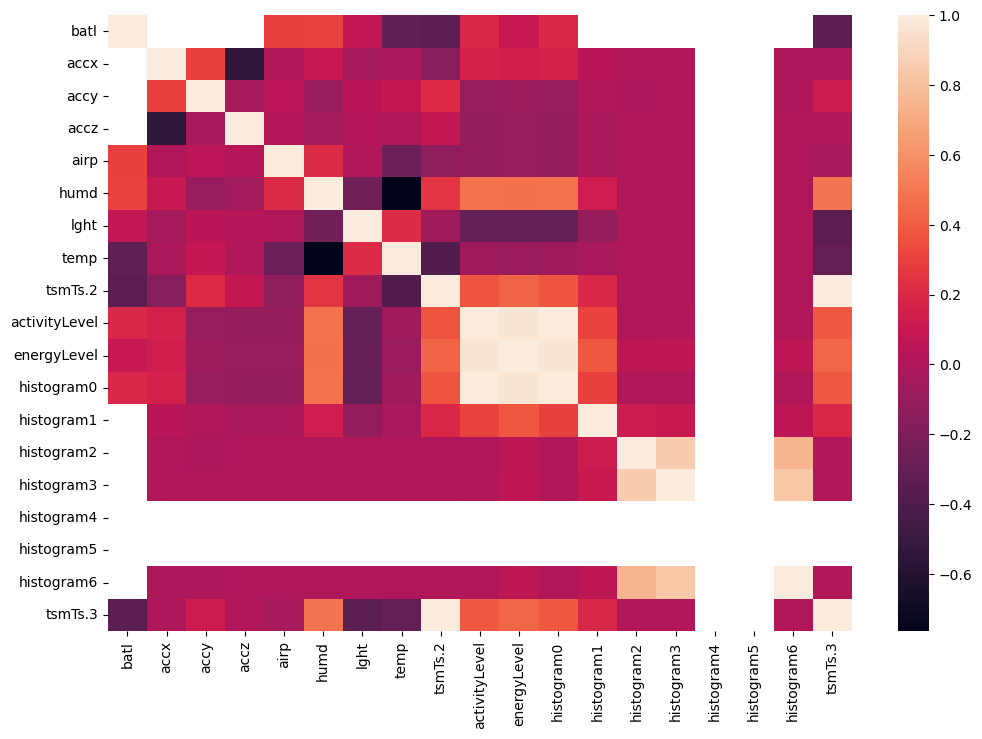

In [35]:
plt.figure(figsize=(12, 8))

copy2 = sensor2.copy()
copy2 = copy2.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3'
])

corr2 = copy2.corr()
sns.heatmap(corr2, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## correlation between feature sensor-3

<AxesSubplot:>

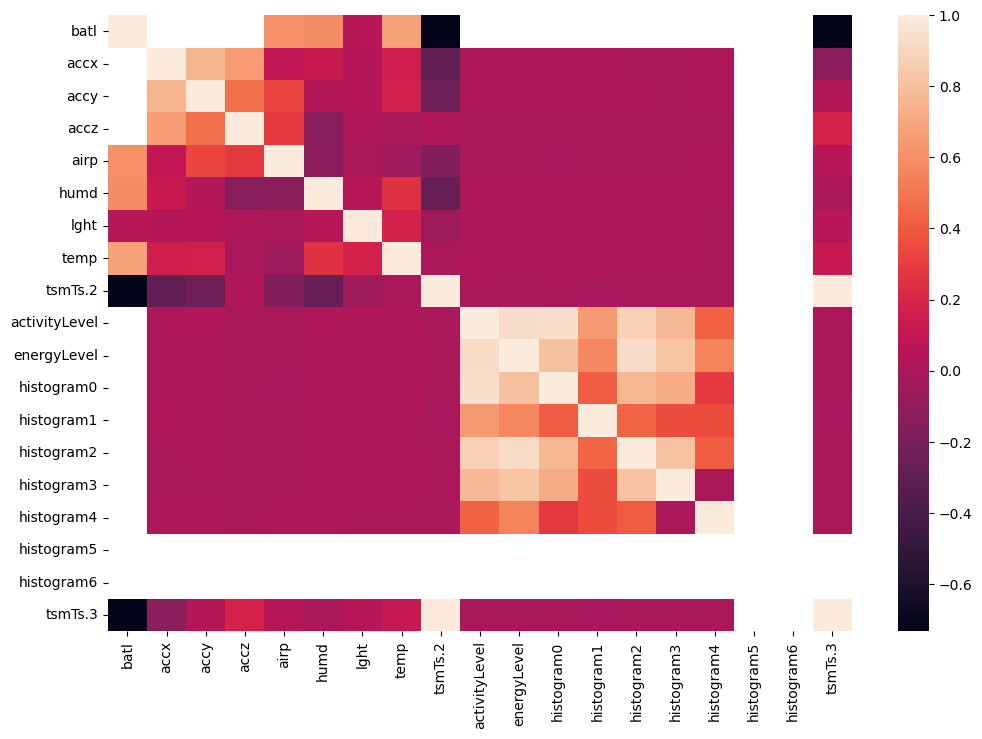

In [36]:
plt.figure(figsize=(12, 8))

copy3 = sensor3.copy()
copy3 = copy3.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3'
])

corr3 = copy3.corr()
sns.heatmap(corr3,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Visualizing Histograms

Histograms presenting the vibrations occur in the device which can indicate when the compressor on or off

The following values is for histograms' thresholder (G represents G-force): <br/>

"histogram0"     : 2,      // > 128mG  <br/>
"histogram1"     : 14,  // > 300mG  <br/>
"histogram2"     : 45,  // > 500mG   <br/>
"histogram3"     : 23,  // > 1G  <br/>
"histogram4"     : 2,   // > 2G <br/>
"histogram5"     : 1,   // > 3G <br/>
"histogram6"     : 0,   // > 4G <br/>
"histogram7"     : 0,   // > 8G <br/>
"histogram8"     : 0,   // > 12G <br/>
"histogram9"     : 0    // > 16G <br/>

## Visualize Histograms in sensor-1

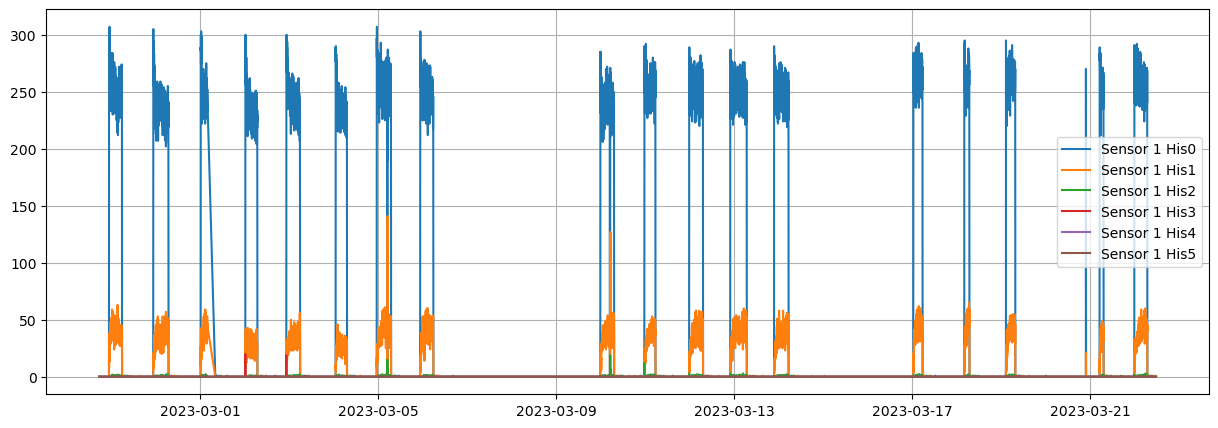

In [37]:
plt.figure(figsize=(15,5))


plt.plot(actlv1_datetime, sensor1.histogram0[:34000], label='Sensor 1 His0')
plt.plot(actlv1_datetime, sensor1.histogram1[:34000], label='Sensor 1 His1')
plt.plot(actlv1_datetime, sensor1.histogram2[:34000], label='Sensor 1 His2')
plt.plot(actlv1_datetime, sensor1.histogram3[:34000], label='Sensor 1 His3')
plt.plot(actlv1_datetime, sensor1.histogram4[:34000], label='Sensor 1 His4')
plt.plot(actlv1_datetime, sensor1.histogram5[:34000], label='Sensor 1 His5')


plt.grid(True)
plt.legend()
plt.show()

## Visualize Histograms in sensor-2

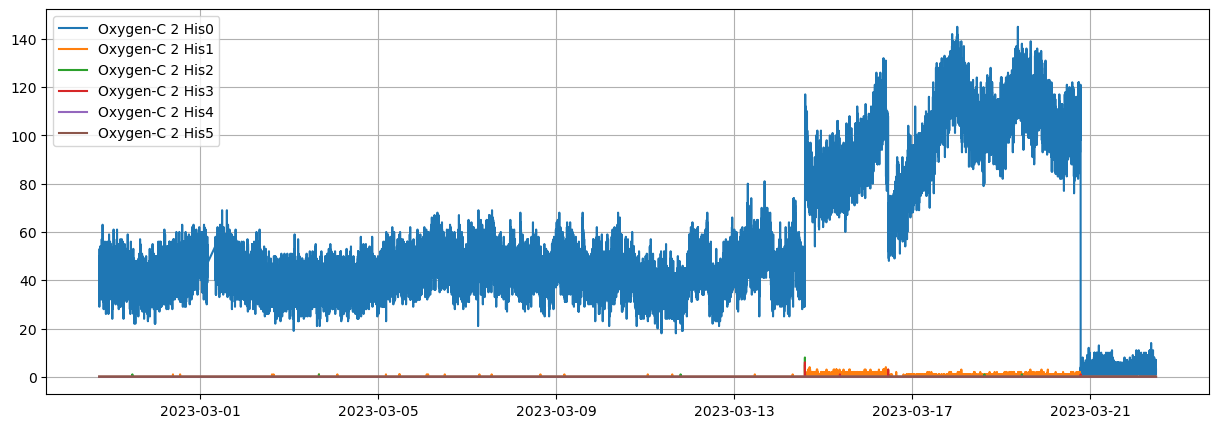

In [38]:
plt.figure(figsize=(15,5))


plt.plot(actlv1_datetime, sensor2.histogram0[:34000], label='Oxygen-C 2 His0')
plt.plot(actlv1_datetime, sensor2.histogram1[:34000], label='Oxygen-C 2 His1')
plt.plot(actlv1_datetime, sensor2.histogram2[:34000], label='Oxygen-C 2 His2')
plt.plot(actlv1_datetime, sensor2.histogram3[:34000], label='Oxygen-C 2 His3')
plt.plot(actlv1_datetime, sensor2.histogram4[:34000], label='Oxygen-C 2 His4')
plt.plot(actlv1_datetime, sensor2.histogram5[:34000], label='Oxygen-C 2 His5')


plt.grid(True)
plt.legend()
plt.show()

## Visualize Histograms in sensor-3

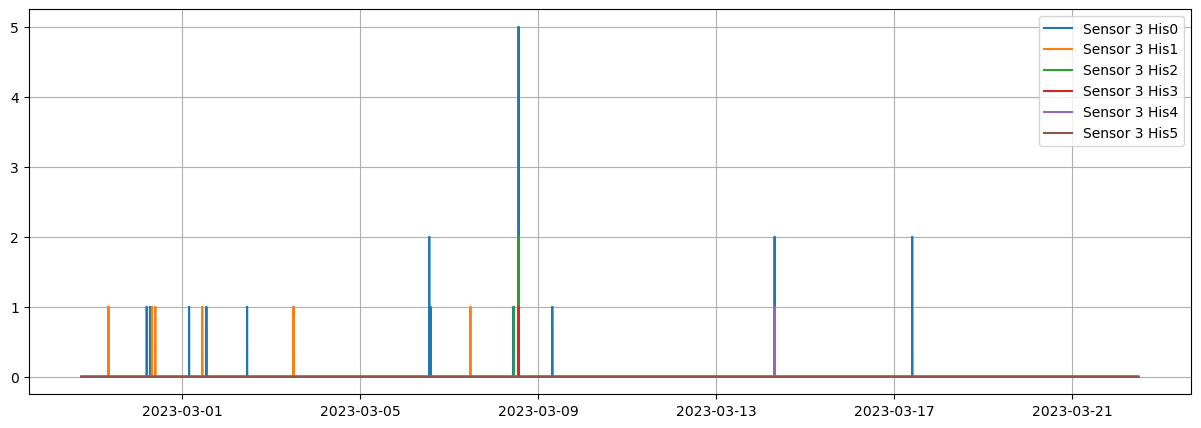

In [39]:
plt.figure(figsize=(15,5))


plt.plot(actlv1_datetime, sensor3.histogram0[:34000], label='Sensor 3 His0')
plt.plot(actlv1_datetime, sensor3.histogram1[:34000], label='Sensor 3 His1')
plt.plot(actlv1_datetime, sensor3.histogram2[:34000], label='Sensor 3 His2')
plt.plot(actlv1_datetime, sensor3.histogram3[:34000], label='Sensor 3 His3')
plt.plot(actlv1_datetime, sensor3.histogram4[:34000], label='Sensor 3 His4')
plt.plot(actlv1_datetime, sensor3.histogram5[:34000], label='Sensor 3 His5')


plt.grid(True)
plt.legend()
plt.show()

 # Data Analysis device-1

In [40]:
device1 = sensor1.copy()
device2 = sensor2.copy()
device1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   batl                 62 non-null     float64
 1   deploymentGroupId    62 non-null     object 
 2   tsmEv                62 non-null     float64
 3   tsmGw                62 non-null     object 
 4   tsmId                62 non-null     float64
 5   tsmTs                62 non-null     float64
 6   tsmTuid              62 non-null     object 
 7   Unnamed: 7           0 non-null      float64
 8   accx                 41000 non-null  float64
 9   accy                 41000 non-null  float64
 10  accz                 41000 non-null  float64
 11  deploymentGroupId.1  41000 non-null  object 
 12  tsmEv.1              41000 non-null  float64
 13  tsmGw.1              41000 non-null  object 
 14  tsmId.1              41000 non-null  float64
 15  tsmTs.1              41000 non-null 

In [41]:
device1 = device1.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3',
    'batl','accx','accy', 'accz','activityLevel', 'histogram1', 'histogram2',
    'histogram3', 'histogram4', 'histogram5', 'histogram6', 'energyLevel'
])
device2 = device2.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3',
    'batl','accx','accy', 'accz','activityLevel', 'histogram1', 'histogram2',
    'histogram3', 'histogram4', 'histogram5', 'histogram6', 'energyLevel'
])

In [42]:
device1

,airp,humd,lght,temp,tsmTs.2,histogram0,tsmTs.3
0,97598.0,52.3,0,7.5,1675116016,0.0,1.677433e+09
1,97597.1,52.3,4,7.5,1675116076,0.0,1.677433e+09
2,97598.3,52.2,4,7.5,1675116135,0.0,1.677433e+09
3,97601.1,52.1,4,7.5,1675116195,0.0,1.677433e+09
4,97603.5,52.2,4,7.5,1675116255,0.0,1.677433e+09
...,...,...,...,...,...,...,...
72085,99323.7,29.1,0,14.5,1679482421,NaN,NaN
72086,99324.9,29.1,4,14.5,1679482481,NaN,NaN
72087,99326.2,29.1,0,14.5,1679482541,NaN,NaN
72088,99325.3,29.1,8,14.5,1679482601,NaN,NaN


In [43]:
sensor1_copy = sensor1[['tsmTs.3', 'histogram0', 'temp']][:34000]
sensor2_copy = sensor2[['tsmTs.3', 'histogram0', 'temp']][:34000]

threshold = 200
# values where histogram0-feature is bigger that threshold
above_threshold = np.where(sensor1_copy.histogram0  >= threshold)[0]
# not null values indices
nonNullHis0 = sensor1_copy.iloc[above_threshold]
nonNullHis0 = nonNullHis0.rename(columns = {'tsmTs.3':'datetime', 'histogram0':'activity_level'} )

#### Visualize all recorded temperature over threshold specified before

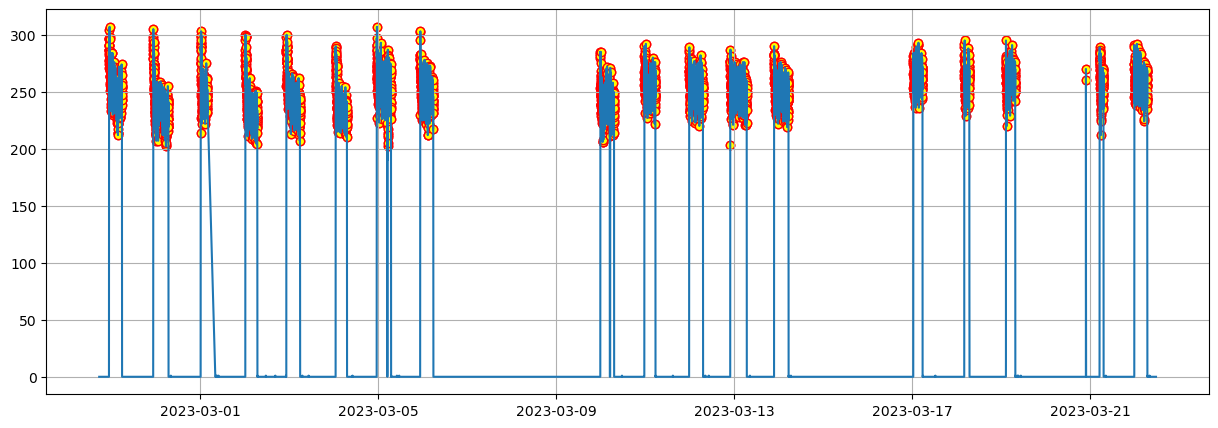

In [44]:
plt.figure(figsize=(15,5))

categorized_datetime = [datetime.datetime.fromtimestamp(x) for x in nonNullHis0['datetime']]

plt.plot(actlv1_datetime, sensor1_copy.histogram0, label='Sensor 1 His0')
plt.scatter(categorized_datetime, nonNullHis0.activity_level, c ="yellow", edgecolor ="red")
plt.scatter(categorized_datetime, nonNullHis0.activity_level, c ="yellow", edgecolor ="red")
        
plt.grid(True)
plt.show()

The following cell takes threshold and return np.array of indices for (start,end) for each wave

In [45]:
def getIndices(threshold : int=0, width :int=100) -> np:
    """
    Works similar to getSegments but return rather indices instead of values
    """
    above_threshold = np.where(sensor1_copy.histogram0 >= threshold)[0]
    nonNullHis0 = sensor1_copy.iloc[above_threshold]

    start_index = nonNullHis0.index[0]
    end_index = nonNullHis0.index[0]
    indices = []
    for i in range(0, above_threshold.size ):
        if (above_threshold[i] - above_threshold[i-1] > width): # width = <wave-width>
            end_index = nonNullHis0.index[i-1]
            indices.append([start_index, end_index])
            start_index = nonNullHis0.index[i]
    return np.array(indices) 


def getSegments(sensor: pd, threshold : int=0, width :int=100) -> np:
    """
    Return 3-dim np.array of values where each 1-dim array is (start, end)
    of indices for a wave.
    width: presents the width of each wave.
    Each wave presents one running-time for a device.
    """
    above_threshold = np.where(sensor.histogram0 > threshold)[0]
    nonNullHis0 = sensor.iloc[above_threshold]

    start_index = nonNullHis0.index[0]
    end_index = nonNullHis0.index[0]
    waves = []
    for i in range(above_threshold.size):        
        if (above_threshold[i] - above_threshold[i-1] > width):  # width = <wave-width>
            end_index = nonNullHis0.index[i-1]
            waves.append([sensor1_copy.iloc[start_index], sensor1_copy.iloc[end_index]])
            start_index = nonNullHis0.index[i]
    return np.array(waves) 
     
getSegments(sensor1, 200, 200).shape



(18, 2, 3)

### Visualize result of getSegmentsIndices()

The following plot shows the start and the end of each running time for device one ignoring the values in between. The propose of it is to indicate what was the time where the device starts functioning and the end-time to collect temp while-running later on.

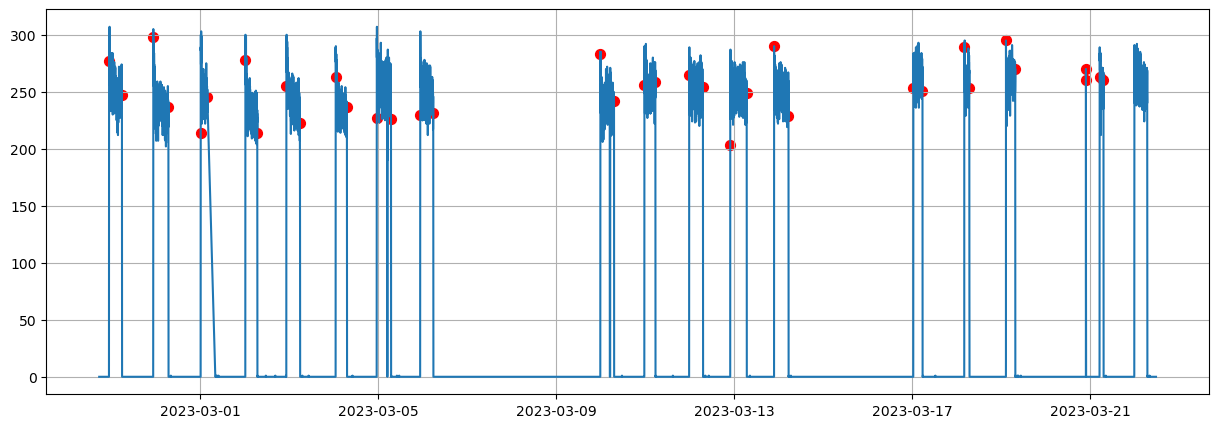

In [46]:
plt.figure(figsize=(15,5))

def getConvertedTime(time):
    return datetime.datetime.fromtimestamp(time) 

def getConvertedArray(device, threshold: int=0, width: int=0):
    arr = getSegments(device, threshold, width)
    above_threshold_datetime = []

    for i in range(arr.shape[0]):
        above_threshold_datetime.append([
            [getConvertedTime(arr[i][0][0]), arr[i][0][1]], 
            [getConvertedTime(arr[i][1][0]), arr[i][1][1]]
        ])

    return np.array(above_threshold_datetime)

arr = getConvertedArray(sensor1, 200, 200)

for i in range(arr.shape[0]):
    plt.scatter(arr[i][0][0], arr[i][0][1], edgecolor ="red", s=50, c='r')
    plt.scatter(arr[i][1][0], arr[i][1][1], edgecolor ="red", s=50, c='r')
plt.plot(actlv1_datetime, sensor1_copy.histogram0)


plt.grid(True)
plt.show()

Minimizing the threshold-parm to 100 will generate the following plot

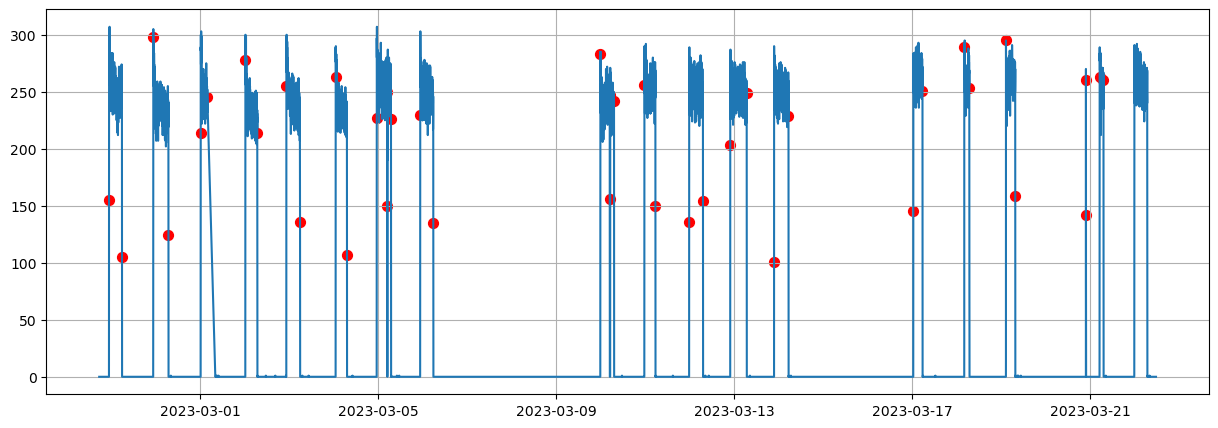

In [47]:
plt.figure(figsize=(15,5))

test1 = getConvertedArray(sensor1_copy, 100, 1)

for i in range(test1.shape[0]):
    plt.scatter(test1[i][0][0], test1[i][0][1], edgecolor ="red", s=50, c='r')
    plt.scatter(test1[i][1][0], test1[i][1][1], edgecolor ="red", s=50, c='r')
plt.plot(actlv1_datetime, sensor1_copy.histogram0)
# plt.plot(actlv2_datetime, sensor2_copy.histogram0)


plt.grid(True)
plt.show()

Comparing the temp and vibration for device-1 and scatter the start and end for each running as the red-scattors show

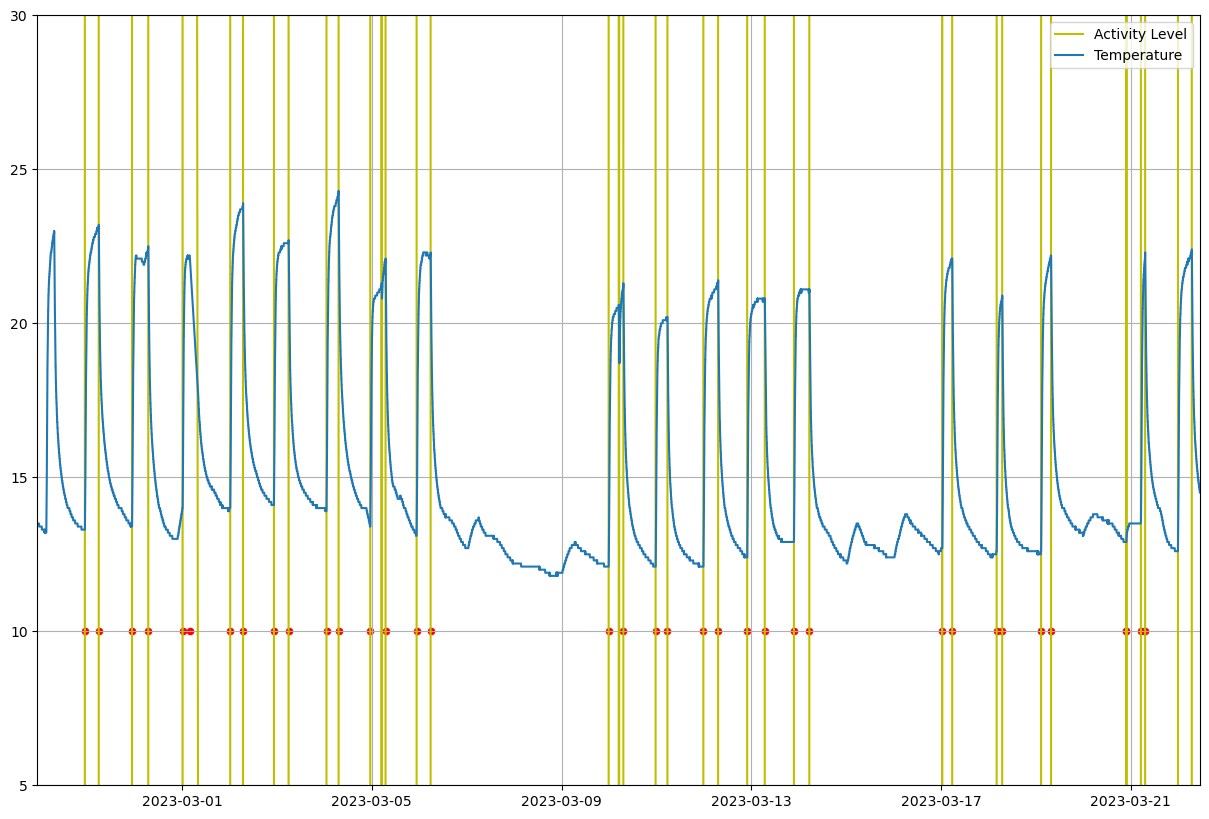

In [48]:
plt.figure(figsize=(15,10))

sensor1_datetime = [datetime.datetime.fromtimestamp(x) for x in device1['tsmTs.2']]

for i in range(arr.shape[0]):
    plt.scatter(arr[i][0][0], 10, edgecolor ="red", s=20, c='r')
    plt.scatter(arr[i][1][0], 10, edgecolor ="red", s=20, c='r')
plt.plot(actlv1_datetime, sensor1_copy.histogram0 , label="Activity Level", c='y')
plt.plot(sensor1_datetime, device1.temp, label='Temperature')

# to zoom in 
plt.ylim(5, 30)
plt.xlim(sensor1_datetime[37000], sensor1_datetime[-1])

plt.grid(True)
plt.legend()


plt.show()

In [49]:
def getTempDuringRunning(sensor, segments, indices):
    """
    @parms sensor: data-frame of the device
    @parms segments: the result of passing sensor-df to getSegments-function
    @parms indices: the reuslt of passing sensor-df to getIndices-function
    @return the function retuns the temperature recorded during running time
    """
    df_during_running = pd.DataFrame(columns = ['from', 'to', 'time', 'temp', 'category']) 
    temp_indices =[]
    
    for i in range(segments.shape[0]):
        temp_indices.append(np.where((sensor['tsmTs.2'] >= segments[i][0][0])&(sensor['tsmTs.2'] <= segments[i][1][0]))[0])
    
    for indices in range(len(temp_indices)):
        temps = 0
        n_temps = 0
        for index in range(temp_indices[indices].shape[0]):
            n_temps += 1
            temps += sensor.iloc[[temp_indices[indices][index]]].temp

             
            new_row = {
                'from':sensor.iloc[[temp_indices[indices][0]]]['tsmTs.2'].values[0],
                'to': sensor.iloc[[temp_indices[0][len(temp_indices)-1]]]['tsmTs.2'].values[0],
                'time': sensor.iloc[[temp_indices[indices][index]]]['tsmTs.2'].values[0],
                'temp': sensor.iloc[[temp_indices[indices][index]]].temp.values[0],
                'category': indices
            }
            df_during_running.loc[len(df_during_running)] = new_row
            
    return df_during_running

sensor1_during_running = getTempDuringRunning(sensor1, getSegments(sensor1, threshold), getIndices(threshold))
sensor2_during_running = getTempDuringRunning(sensor2, getSegments(sensor2, 10), getIndices(10))

In [50]:
sensor1_during_running.head(5)

,from,to,time,temp,category
0,1677451885,1677452904,1677451885,13.3,0
1,1677451885,1677452904,1677451945,13.4,0
2,1677451885,1677452904,1677452005,13.4,0
3,1677451885,1677452904,1677452065,13.4,0
4,1677451885,1677452904,1677452125,13.5,0


In [51]:
sensor2_during_running.head(5)

,from,to,time,temp,category
0,1677432791,1677433031,1677432791,28.6,0
1,1677432791,1677433031,1677432851,28.5,0
2,1677432791,1677433031,1677432911,28.5,0
3,1677432791,1677433031,1677432971,28.5,0
4,1677432791,1677433031,1677433031,28.5,0


#### Show temp when device-one is on

[Text(1677250000.0, 0, ''),
 Text(1677500000.0, 0, ''),
 Text(1677750000.0, 0, ''),
 Text(1678000000.0, 0, ''),
 Text(1678250000.0, 0, ''),
 Text(1678500000.0, 0, ''),
 Text(1678750000.0, 0, ''),
 Text(1679000000.0, 0, ''),
 Text(1679250000.0, 0, ''),
 Text(1679500000.0, 0, '')]

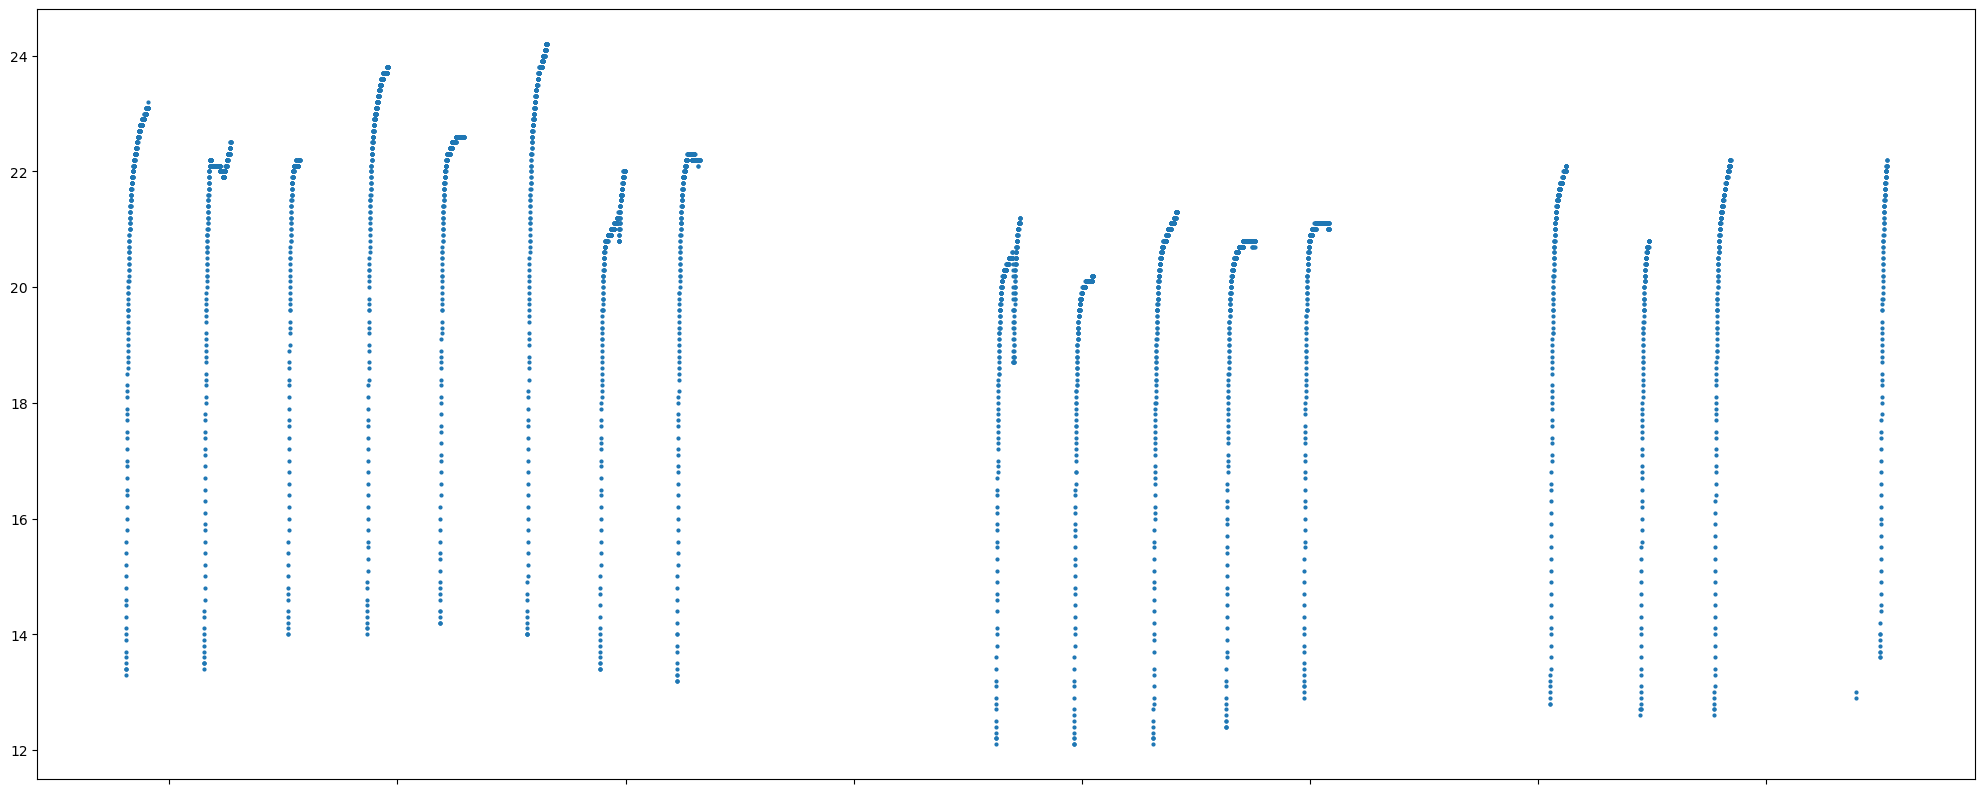

In [52]:
plt.figure(figsize=(25,10))
plt.scatter(sensor1_during_running.time, sensor1_during_running.temp, s=4)
plt.gca().xaxis.set_ticklabels([])


#### Show temp when device-two is on


[Text(1677250000.0, 0, ''),
 Text(1677500000.0, 0, ''),
 Text(1677750000.0, 0, ''),
 Text(1678000000.0, 0, ''),
 Text(1678250000.0, 0, ''),
 Text(1678500000.0, 0, ''),
 Text(1678750000.0, 0, ''),
 Text(1679000000.0, 0, ''),
 Text(1679250000.0, 0, ''),
 Text(1679500000.0, 0, ''),
 Text(1679750000.0, 0, '')]

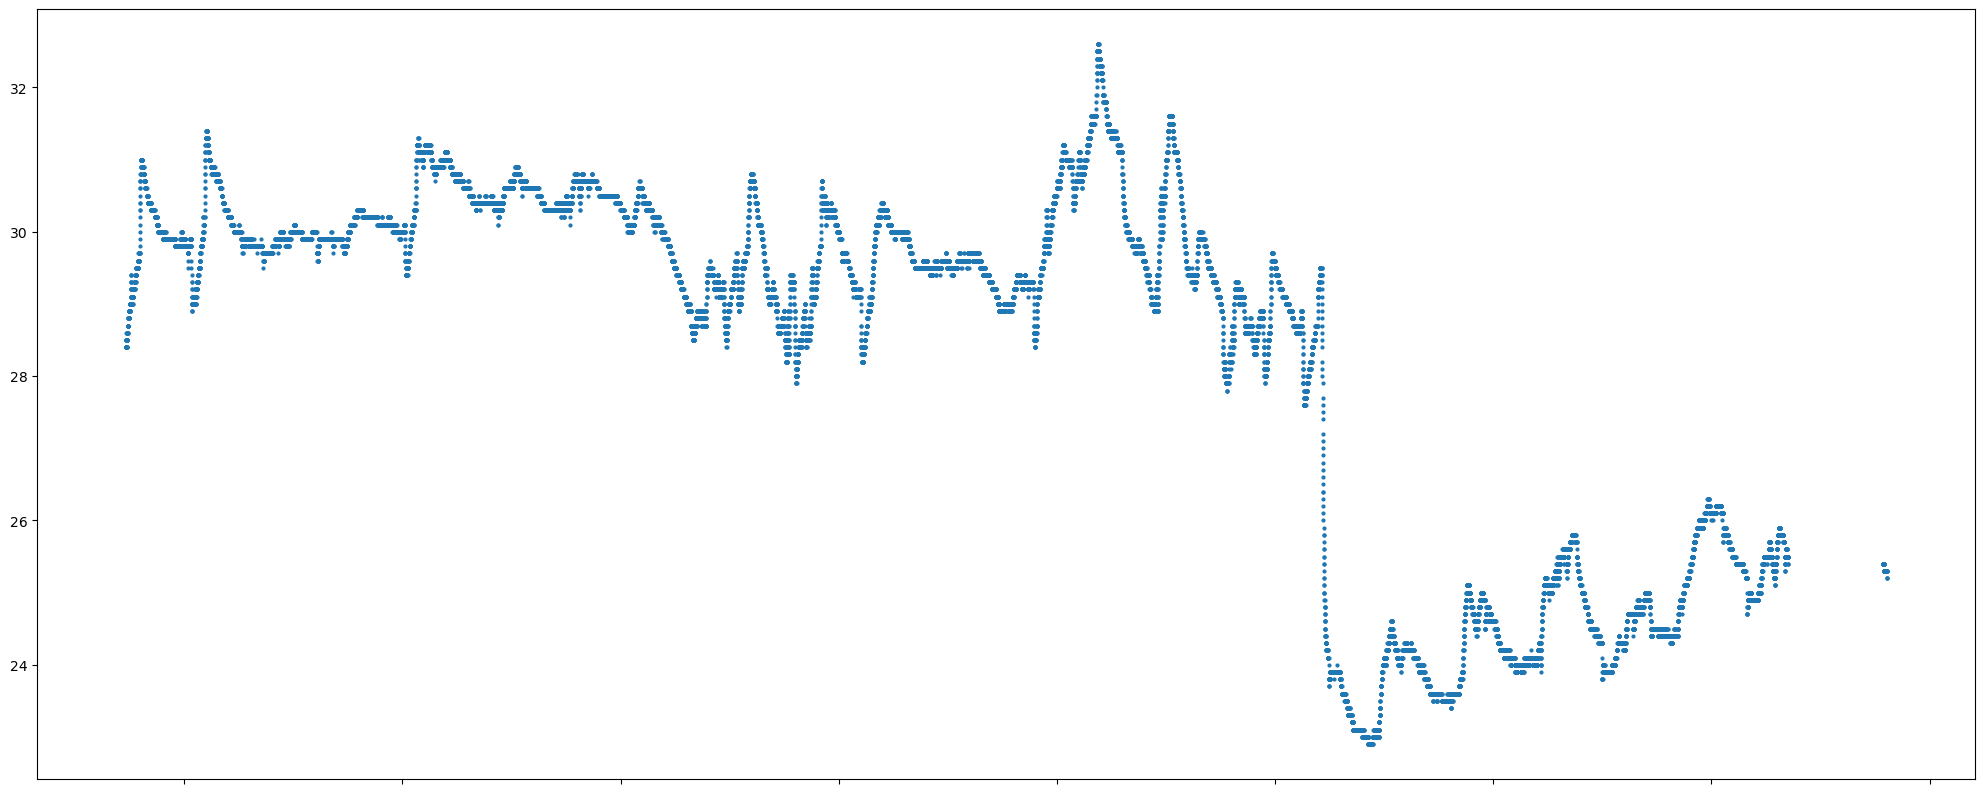

In [53]:
plt.figure(figsize=(25,10))
plt.scatter(sensor2_during_running.time, sensor2_during_running.temp, s=4)
plt.gca().xaxis.set_ticklabels([])


In [54]:
cat_1 = np.where(sensor1_during_running.category == 0)
cat_2 = np.where(sensor1_during_running.category == 1)
cat_3 = np.where(sensor1_during_running.category == 2)
cat_4 = np.where(sensor1_during_running.category == 3)
cat_5 = np.where(sensor1_during_running.category == 4)
cat_6 = np.where(sensor1_during_running.category == 5)

#### combide all scatter into one day-running in device-one

There still an issue with the scatter where each running time starts in different time and for different number of houre.
This can be fixed by relaying on number of running-houre instead of starting-time

The following scatter shows 6 running-time

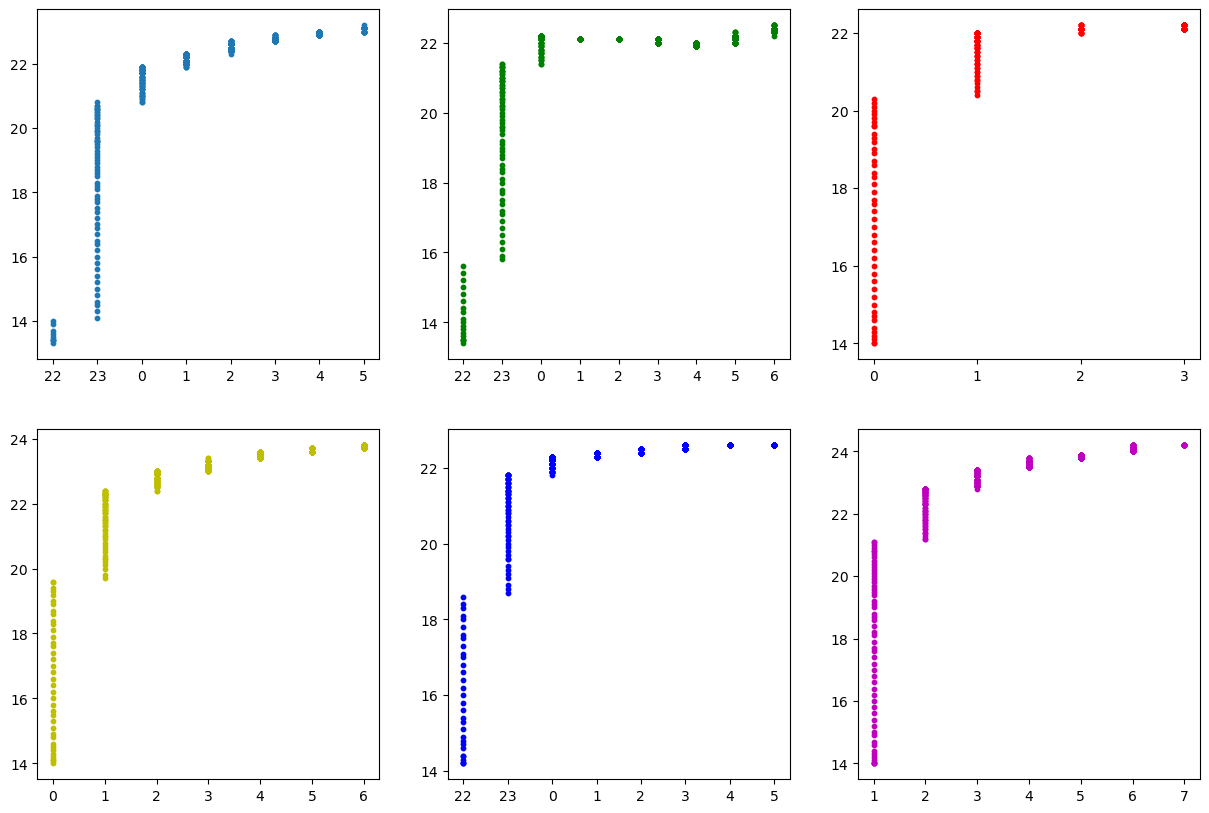

<Figure size 1200x800 with 0 Axes>

In [55]:
figure, axis = plt.subplots(2, 3,   figsize=(15, 10))

plt.figure(figsize=(12,8))

size = 10

from_time1 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_1]['time']]
from_time2 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_2]['time']]
from_time3 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_3]['time']]
from_time4 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_4]['time']]
from_time5 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_5]['time']]
from_time6 = [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[cat_6]['time']]


axis[0, 0].scatter(from_time1, sensor1_during_running.iloc[cat_1]['temp'], s=size)
axis[0, 1].scatter(from_time2, sensor1_during_running.iloc[cat_2]['temp'], s=size, color='g')
axis[0, 2].scatter(from_time3, sensor1_during_running.iloc[cat_3]['temp'], s=size, color='r')
axis[1, 0].scatter(from_time4, sensor1_during_running.iloc[cat_4]['temp'], s=size, color='y')
axis[1, 1].scatter(from_time5, sensor1_during_running.iloc[cat_5]['temp'], s=size, color='b')
axis[1, 2].scatter(from_time6, sensor1_during_running.iloc[cat_6]['temp'], s=size, color='m')


plt.show()

## Sensor 1

The following show all of runnigng for data-frame from the time of starting the device

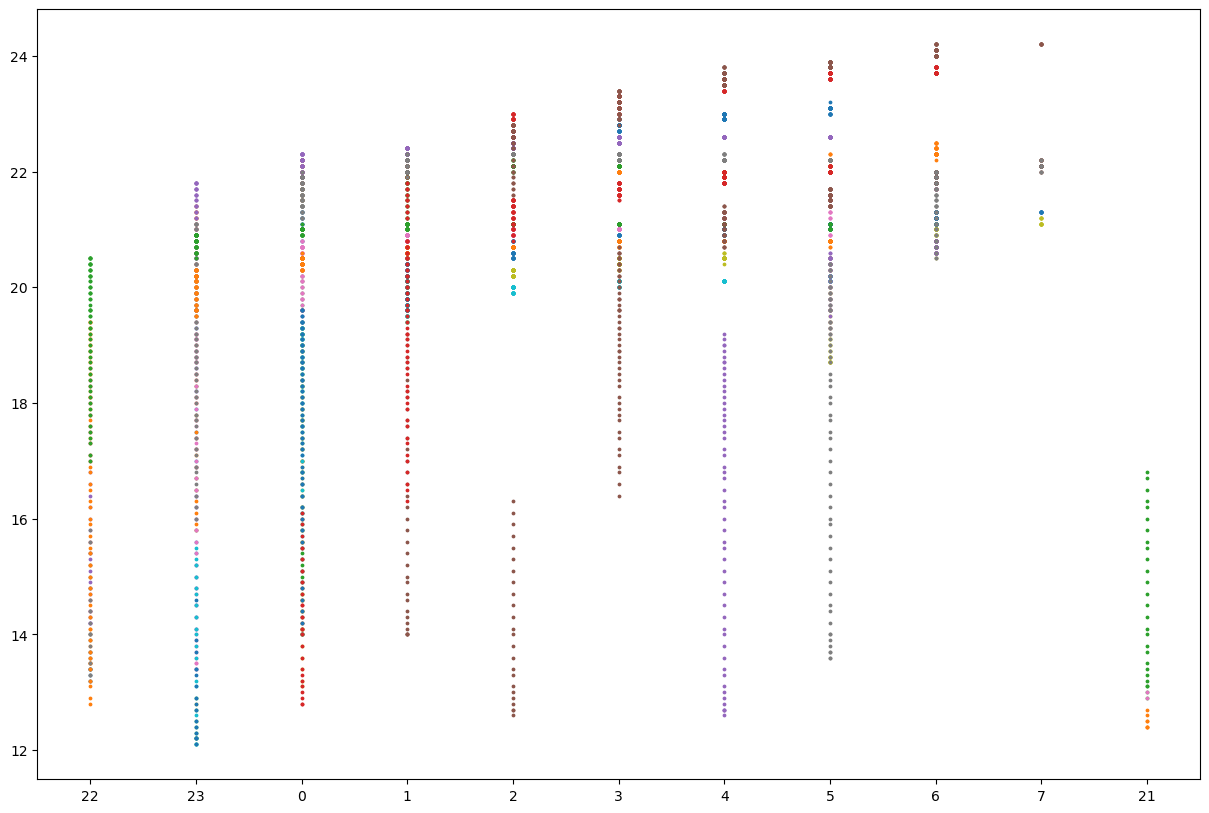

In [56]:
plt.figure(figsize=(15,10))
for i in sensor1_during_running.category.unique():
    plt.scatter(
        [str(getConvertedTime(x).time().hour) for x in sensor1_during_running.iloc[
        np.where(sensor1_during_running.category == i) # iterate over categories 
    ]['time']], sensor1_during_running.iloc[
            np.where(sensor1_during_running.category == i)
        ]['temp']
    ,s=3)


## Sensor 2

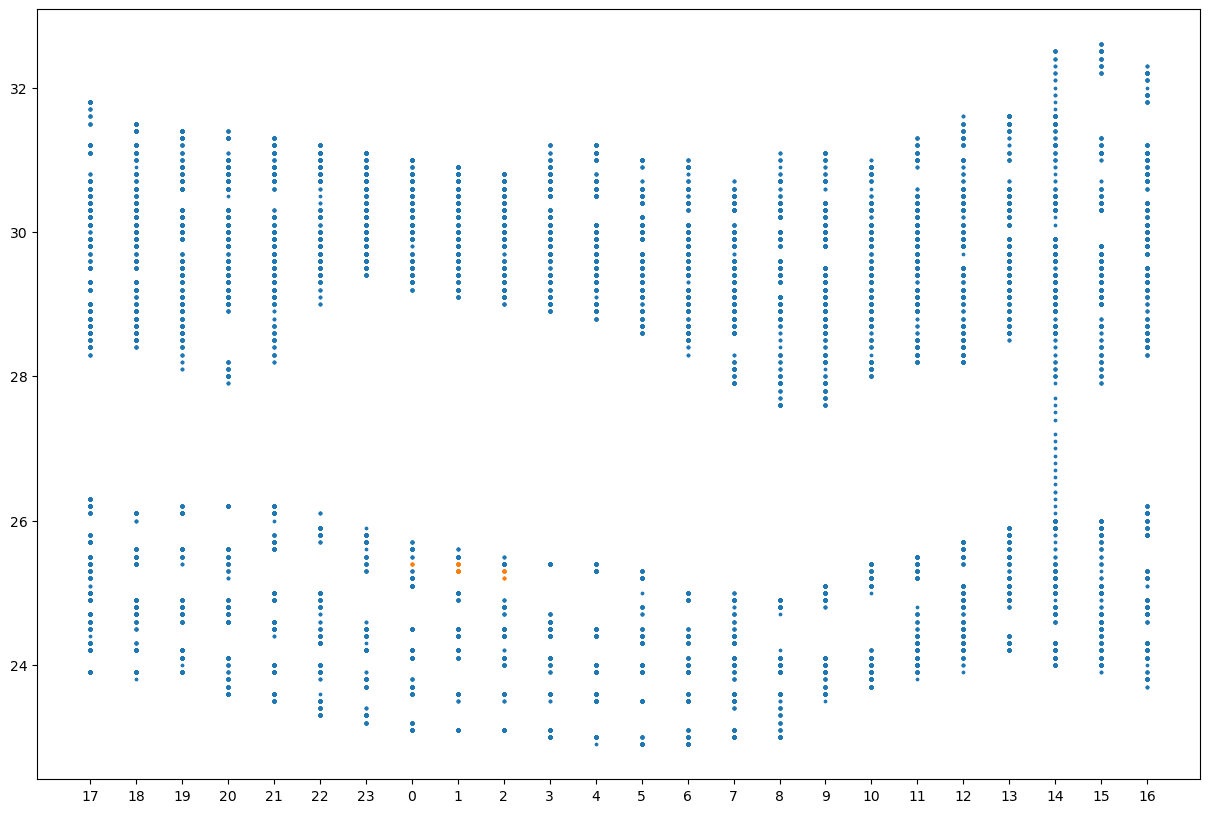

In [57]:
plt.figure(figsize=(15,10))
for i in sensor2_during_running.category.unique():
    plt.scatter(
        [str(getConvertedTime(x).time().hour) for x in sensor2_during_running.iloc[
        np.where(sensor2_during_running.category == i) # iterate over categories 
    ]['time']], sensor2_during_running.iloc[
            np.where(sensor2_during_running.category == i)
        ]['temp']
    ,s=3)
    

In [58]:
def convertSec(sec :int=0) -> float:
    hours = sec / 3600.0
    return round(hours, 2)

con_hour_sen1 = convertSec(int(
    sensor1_during_running.iloc[cat_1]['time'][210] - sensor1_during_running.iloc[cat_1]['from'][210]
))

type (con_hour_sen1)

float

In [59]:
print(sensor1_during_running.dtypes)
print(sensor2_during_running.dtypes)

from         object
to           object
time         object
temp        float64
category     object
dtype: object
from         object
to           object
time         object
temp        float64
category     object
dtype: object


convert type into numaric

In [60]:
sensor1_during_running = sensor1_during_running.apply(pd.to_numeric)
sensor2_during_running = sensor2_during_running.apply(pd.to_numeric)

print(sensor1_during_running.dtypes)
print(sensor2_during_running.dtypes)

from          int64
to            int64
time          int64
temp        float64
category      int64
dtype: object
from          int64
to            int64
time          int64
temp        float64
category      int64
dtype: object


In [61]:
sensor1_during_running['running_time'] = convertSec(sensor1_during_running['time'] - sensor1_during_running['from'])
sensor2_during_running['running_time'] = convertSec(sensor2_during_running['time'] - sensor2_during_running['from'])


## Sensor 1

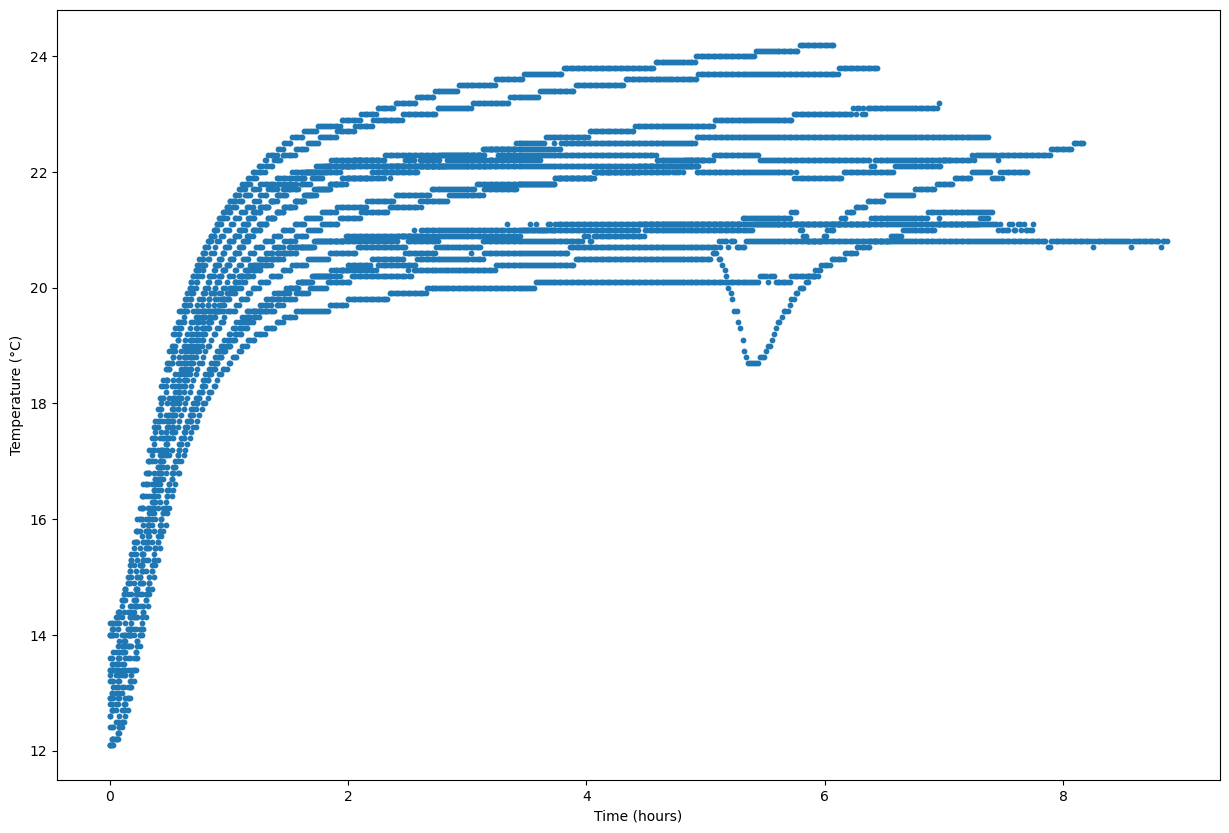

In [84]:
plt.figure(figsize=(15,10))
plt.scatter(sensor1_during_running['running_time'], sensor1_during_running['temp'], s=size)
 
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.show()

## Sensor 2

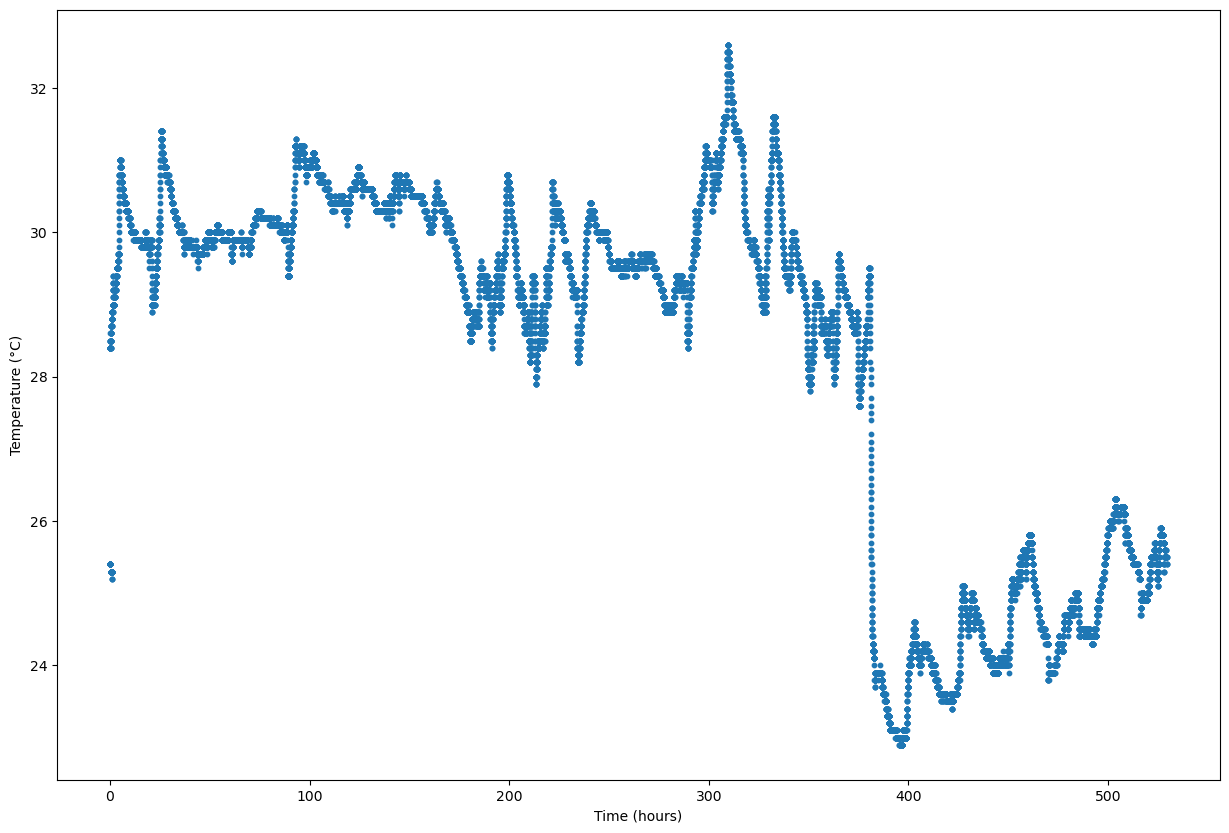

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(sensor2_during_running['running_time'], sensor2_during_running['temp'], s=size)


plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.show()

# Predicting temp function

In [64]:
def calculate_logarithmic(n_hours, temp :float=0.000):
    if n_hours == 0:
        return temp
    return round(14.85 + 1.759 * np.log(n_hours * temp), 2)

### safe copies for data-frame device-1 before testing

In [65]:
def getFirstTemp(df):
    first_temp_per_category = {}
    
    for i in df.category.unique():
        first_temp_per_category[i] = df.temp[np.where(df.category == i)[0][0]]
        
    return first_temp_per_category

In [66]:
safe_copy_sensor1 = sensor1_during_running.copy()
safe_copy_sensor1['temp_at_start'] =  safe_copy_sensor1.apply(lambda x: getFirstTemp(safe_copy_sensor1).get(x['category']), axis=1 )
safe_copy_sensor1 = safe_copy_sensor1.drop(safe_copy_sensor1[safe_copy_sensor1.running_time == 0].index)
safe_copy_sensor1[safe_copy_sensor1.running_time == 0]
safe_copy_sensor1['temp_vs_runningTime'] = safe_copy_sensor1.apply(lambda row: calculate_logarithmic(
    row['running_time'] , row['temp_at_start']), axis=1)

# Standard Deviation

The following fig shows the st-Dev for each hour of running, notice how the its value differ too much when h=0. The value will be worst if it was tested across many devices where each is placed in different env. Thus, the first hour omitted from calculation

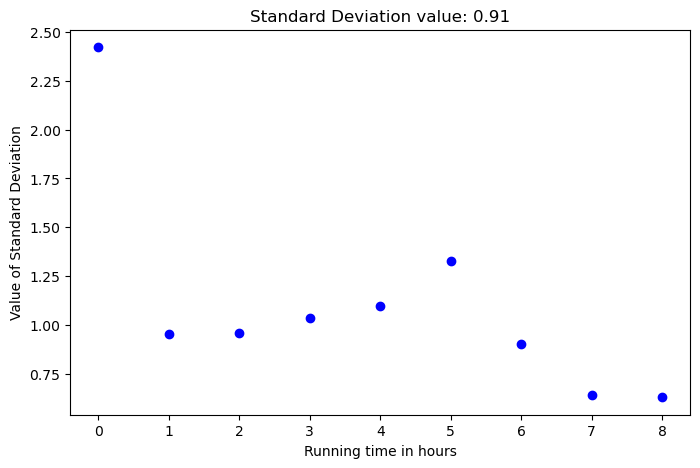

In [67]:
plt.figure(figsize=(8,5))

st = 0
r = 2

for i in range(0, 9):
    st += safe_copy_sensor1[(safe_copy_sensor1['running_time'] >= i) & (safe_copy_sensor1['running_time'] < i+1)].temp.std()
    r +=1
    plt.scatter(i,
             safe_copy_sensor1[(safe_copy_sensor1['running_time'] >= i) & 
                               (safe_copy_sensor1['running_time'] < i+1)].temp.std(), c='b'
            )
plt.xlabel('Running time in hours') 
plt.ylabel('Value of Standard Deviation')
plt.title("Standard Deviation value: " + str(round(st/r,2)))
plt.show()

# Varify predicting temp on device-one

In [68]:
test_sensor1 = device1.copy()
test_sensor1 = test_sensor1.drop(columns=['histogram0', 'tsmTs.3'])
test_datatime_sensor1 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1['tsmTs.2']]

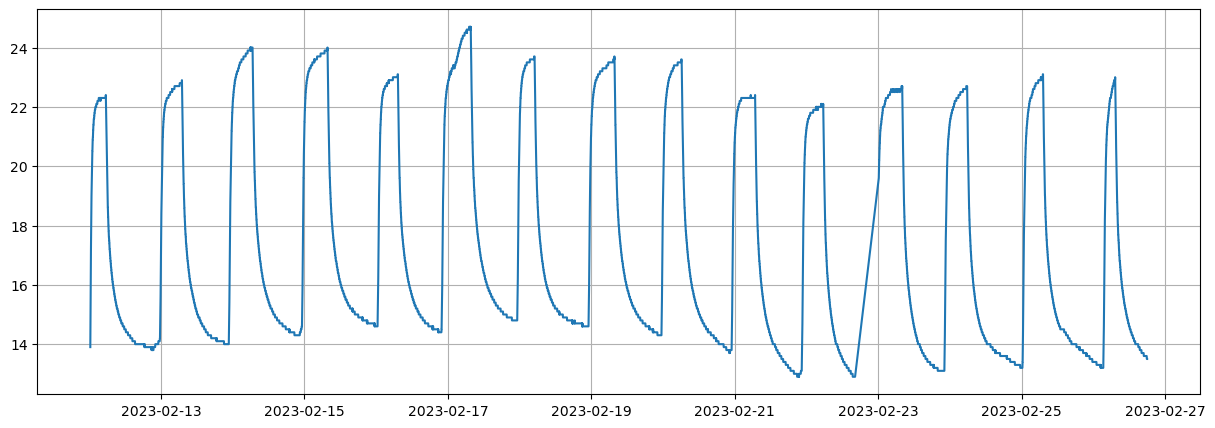

In [69]:
start_test = 1676161100
end_test = 1677434399

test_datatime_sensor1_m = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > start_test) & (test_sensor1['tsmTs.2'] <= end_test)
]['tsmTs.2']]


plt.figure(figsize=(15,5))
 
plt.plot(test_datatime_sensor1_m, test_sensor1[
    (test_sensor1['tsmTs.2'] > start_test) & (test_sensor1['tsmTs.2'] <= end_test)
].temp, label='Temperature 1') 


plt.grid(True)
plt.show()

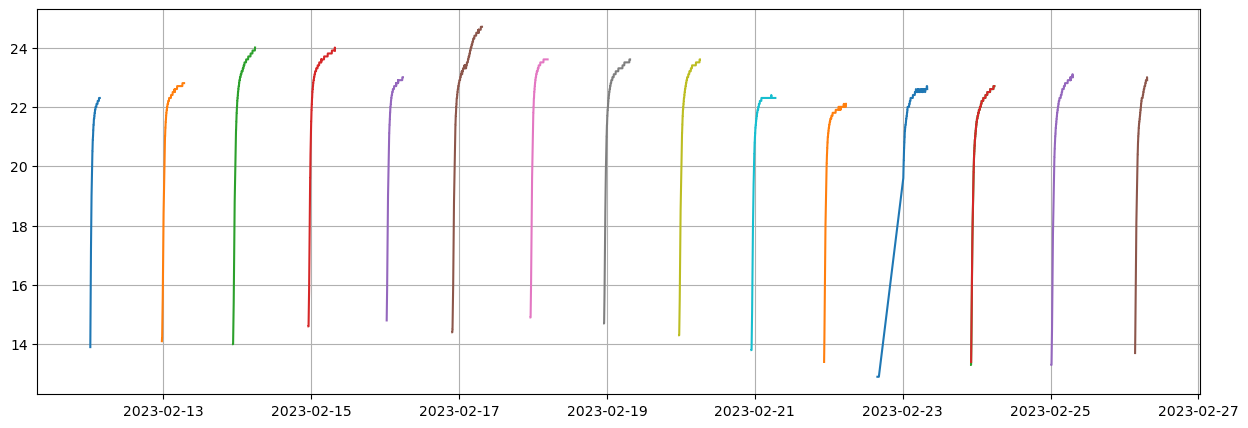

In [70]:
plt.figure(figsize=(15,5))

# start = 1676244739
# end = 1676270739

test_datatime_sensor1_waves1 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676161100) & (test_sensor1['tsmTs.2'] <= 1676172199)
]['tsmTs.2']]

test_datatime_sensor1_waves2 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676244739) & (test_sensor1['tsmTs.2'] <= 1676270739)
]['tsmTs.2']]

test_datatime_sensor1_waves3 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676327839) & (test_sensor1['tsmTs.2'] <= 1676353639)
]['tsmTs.2']]

test_datatime_sensor1_waves4 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676416039) & (test_sensor1['tsmTs.2'] <= 1676447039)
]['tsmTs.2']]

test_datatime_sensor1_waves5 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676507439) & (test_sensor1['tsmTs.2'] <= 1676526439)
]['tsmTs.2']]

test_datatime_sensor1_waves6 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676584039) & (test_sensor1['tsmTs.2'] <= 1676618839)
]['tsmTs.2']]

test_datatime_sensor1_waves7 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676675516) & (test_sensor1['tsmTs.2'] <= 1676695516)
]['tsmTs.2']]

test_datatime_sensor1_waves8 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676761416) & (test_sensor1['tsmTs.2'] <= 1676791816)
]['tsmTs.2']]

test_datatime_sensor1_waves9 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676849116) & (test_sensor1['tsmTs.2'] <= 1676873416)
]['tsmTs.2']]

test_datatime_sensor1_waves10 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676933616) & (test_sensor1['tsmTs.2'] <= 1676961616)
]['tsmTs.2']]

test_datatime_sensor1_waves11 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677080816) & (test_sensor1['tsmTs.2'] <= 1677139016)
]['tsmTs.2']]

test_datatime_sensor1_waves12 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677018516) & (test_sensor1['tsmTs.2'] <= 1677044116)
]['tsmTs.2']]

test_datatime_sensor1_waves13 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677190216) & (test_sensor1['tsmTs.2'] <= 1677217516)
]['tsmTs.2']]

test_datatime_sensor1_waves14 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677190300) & (test_sensor1['tsmTs.2'] <= 1677217406)
]['tsmTs.2']]

test_datatime_sensor1_waves15 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677284216) & (test_sensor1['tsmTs.2'] <= 1677309016)
]['tsmTs.2']]

test_datatime_sensor1_waves16 = [datetime.datetime.fromtimestamp(x) for x in test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677381906) & (test_sensor1['tsmTs.2'] <= 1677396016)
]['tsmTs.2']]

# wave-1
plt.plot(test_datatime_sensor1_waves1, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676161100) & (test_sensor1['tsmTs.2'] <= 1676172199)
].temp, label='Temperature 1') 

# wave-2
plt.plot(test_datatime_sensor1_waves2, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676244739) & (test_sensor1['tsmTs.2'] <= 1676270739)
].temp, label='Temperature 1')

# wave-3
plt.plot(test_datatime_sensor1_waves3, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676327839) & (test_sensor1['tsmTs.2'] <= 1676353639)
].temp, label='Temperature 1')

# wave-4
plt.plot(test_datatime_sensor1_waves4, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676416039) & (test_sensor1['tsmTs.2'] <= 1676447039)
].temp, label='Temperature 1')

# wave-5
plt.plot(test_datatime_sensor1_waves5, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676507439) & (test_sensor1['tsmTs.2'] <= 1676526439)
].temp, label='Temperature 1')

# wave-6
plt.plot(test_datatime_sensor1_waves6, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676584039) & (test_sensor1['tsmTs.2'] <= 1676618839)
].temp, label='Temperature 1')

# wave-7
plt.plot(test_datatime_sensor1_waves7, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676675516) & (test_sensor1['tsmTs.2'] <= 1676695516)
].temp, label='Temperature 1')

# wave-8
plt.plot(test_datatime_sensor1_waves8, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676761416) & (test_sensor1['tsmTs.2'] <= 1676791816)
].temp, label='Temperature 1')

# wave-9
plt.plot(test_datatime_sensor1_waves9, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676849116) & (test_sensor1['tsmTs.2'] <= 1676873416)
].temp, label='Temperature 1')

# wave-10
plt.plot(test_datatime_sensor1_waves10, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1676933616) & (test_sensor1['tsmTs.2'] <= 1676961616)
].temp, label='Temperature 1')

# wave-11
plt.plot(test_datatime_sensor1_waves11, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677080816) & (test_sensor1['tsmTs.2'] <= 1677139016)
].temp, label='Temperature 1')

# wave-12
plt.plot(test_datatime_sensor1_waves12, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677018516) & (test_sensor1['tsmTs.2'] <= 1677044116)
].temp, label='Temperature 1') 

# wave-13
plt.plot(test_datatime_sensor1_waves13, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677190216) & (test_sensor1['tsmTs.2'] <= 1677217516)
].temp, label='Temperature 1')

# wave-14
plt.plot(test_datatime_sensor1_waves14, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677190300) & (test_sensor1['tsmTs.2'] <= 1677217406)
].temp, label='Temperature 1')

# wave-15
plt.plot(test_datatime_sensor1_waves15, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677284216) & (test_sensor1['tsmTs.2'] <= 1677309016)
].temp, label='Temperature 1')

# wave-16
plt.plot(test_datatime_sensor1_waves16, test_sensor1[
    (test_sensor1['tsmTs.2'] > 1677381906) & (test_sensor1['tsmTs.2'] <= 1677396016)
].temp, label='Temperature 1')

plt.grid(True)
plt.show()

In [71]:
test_wave1  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676161100) & (test_sensor1['tsmTs.2'] <= 1676172199)]
test_wave2  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676244739) & (test_sensor1['tsmTs.2'] <= 1676270739)]
test_wave3  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676327839) & (test_sensor1['tsmTs.2'] <= 1676353639)]
test_wave4  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676416039) & (test_sensor1['tsmTs.2'] <= 1676447039)]
test_wave5  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676507439) & (test_sensor1['tsmTs.2'] <= 1676526439)]
test_wave6  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676584039) & (test_sensor1['tsmTs.2'] <= 1676618839)]
test_wave7  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676675516) & (test_sensor1['tsmTs.2'] <= 1676695516)]
test_wave8  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676761416) & (test_sensor1['tsmTs.2'] <= 1676791816)]
test_wave9  = test_sensor1[(test_sensor1['tsmTs.2'] > 1676849116) & (test_sensor1['tsmTs.2'] <= 1676873416)]
test_wave10 = test_sensor1[(test_sensor1['tsmTs.2'] > 1676933616) & (test_sensor1['tsmTs.2'] <= 1676961616)]
test_wave11 = test_sensor1[(test_sensor1['tsmTs.2'] > 1677080816) & (test_sensor1['tsmTs.2'] <= 1677139016)]
test_wave12 = test_sensor1[(test_sensor1['tsmTs.2'] > 1677018516) & (test_sensor1['tsmTs.2'] <= 1677044116)]
test_wave13 = test_sensor1[(test_sensor1['tsmTs.2'] > 1677190216) & (test_sensor1['tsmTs.2'] <= 1677217516)]
test_wave14 = test_sensor1[(test_sensor1['tsmTs.2'] > 1677190300) & (test_sensor1['tsmTs.2'] <= 1677217406)]
test_wave15 = test_sensor1[(test_sensor1['tsmTs.2'] > 1677284216) & (test_sensor1['tsmTs.2'] <= 1677309016)]
test_wave16 = test_sensor1[(test_sensor1['tsmTs.2'] > 1677381906) & (test_sensor1['tsmTs.2'] <= 1677396016)]

test_waves = [
    test_wave1,
    test_wave2,
    test_wave3,
    test_wave4,
    test_wave5,
    test_wave6,
    test_wave7,
    test_wave8,
    test_wave9,
    test_wave10,
#     test_wave11,
    test_wave12,
    test_wave13,
    test_wave14,
    test_wave15,
    test_wave16,
]

In [72]:
# create running-time feature

for wave in test_waves:
    wave['running_time'] = convertSec(wave['tsmTs.2'] - (wave.iloc[0]['tsmTs.2']-100))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Residual for wave            airp  humd  lght  temp     tsmTs.2  running_time
17367  99672.9  40.3     0  13.9  1676161154          0.03
17368  99680.4  39.6     0  14.2  1676161214          0.04
17369  99673.2  38.9     0  14.5  1676161274          0.06
17370  99676.5  38.3     0  14.8  1676161334          0.08
17371  99680.0  37.7     0  15.1  1676161394          0.09
...        ...   ...   ...   ...         ...           ...
17547  99691.0  25.1     8  22.3  1676171937          3.02
17548  99691.4  25.2     8  22.3  1676171997          3.04
17549  99689.3  25.2     8  22.3  1676172057          3.06
17550  99688.9  25.2     8  22.3  1676172117          3.07
17551  99688.9  25.2     8  22.3  1676172177          3.09

[185 rows x 6 columns]  =  0.4178675675675675
Root Residual for wave            airp  humd  lght  temp     tsmTs.2  running_time
17367  99672.9  40.3     0  13.9  1676161154          0.03
17368  99680.4  39.6     0  14.2  1676161214          0.04
17369  99673.2  38.9     

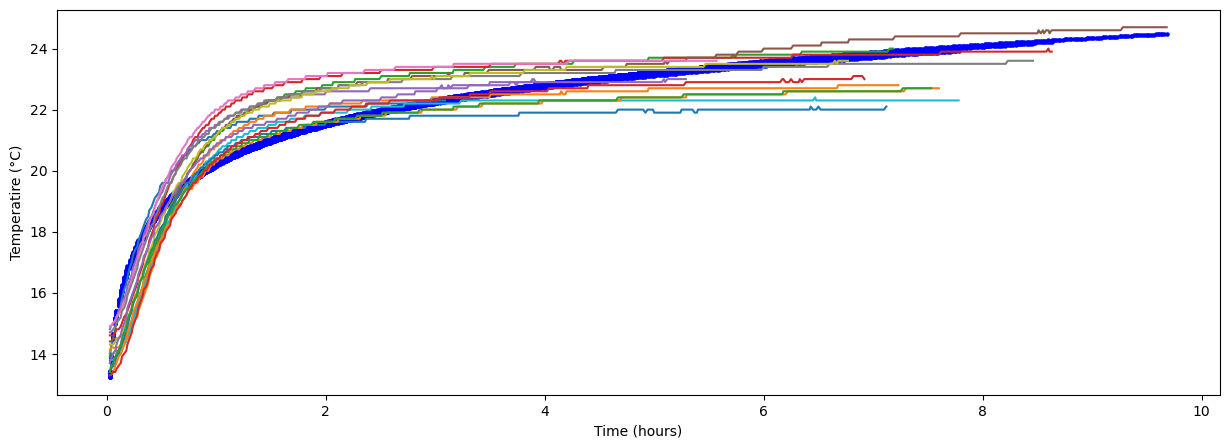

In [83]:
import math
import sklearn.metrics as metrics


plt.figure(figsize=(15,5))

mean_residuals = 0

for wave in test_waves:
    residuals = 0
    n = 0

    plt.plot(wave['running_time'], wave.temp, label="Actual Temperature")
    for w in range(wave.shape[0]):
        plt.scatter(wave.iloc[w]['running_time'], calculate_logarithmic(wave.iloc[w]['running_time'], wave.iloc[w]['temp']), s=5, c='b')
        residuals += (wave.iloc[w].temp - calculate_logarithmic(wave.iloc[w]['running_time'], wave.iloc[w]['temp']))**2
        n+=1
    mean_residuals += residuals
    print("Residual for the wave = ", (residuals/n))  
    print("Root Residual for the wave = ", math.sqrt(residuals/n))
    
print("MSE = " + str(residuals/n))
print("RMSE = " + str(math.sqrt(residuals/n)))

plt.xlabel("Time (hours)")
plt.ylabel("Temperatire (°C)")

plt.show()

# Testing predicting temp on device-two

In [74]:
wave_oc2  = sensor2[(sensor2['tsmTs.2'] > 1677030027) & (sensor2['tsmTs.2'] < 1678772027)]
wave_oc2_datetime = [datetime.datetime.fromtimestamp(x) for x in wave_oc2['tsmTs.2']]
wave_oc2

,batl,deploymentGroupId,tsmEv,tsmGw,tsmId,tsmTs,tsmTuid,Unnamed: 7,accx,accy,...,histogram2,histogram3,histogram4,histogram5,histogram6,tsmEv.3,tsmGw.3,tsmId.3,tsmTs.3,tsmTuid.3
31953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-50.0,22.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.679363e+09,TSPD04ESY01802042
31954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.0,14.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.679363e+09,TSPD04ESY01802042
31955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-61.0,13.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.679363e+09,TSPD04ESY01802042
31956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,35.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.679363e+09,TSPD04ESY01802042
31957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,35.0,...,0.0,0.0,0.0,0.0,0.0,10.0,TSGW01ETR02900094,16100.0,1.679363e+09,TSPD04ESY01802042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The following is the full data-set of device two while collecting temperature

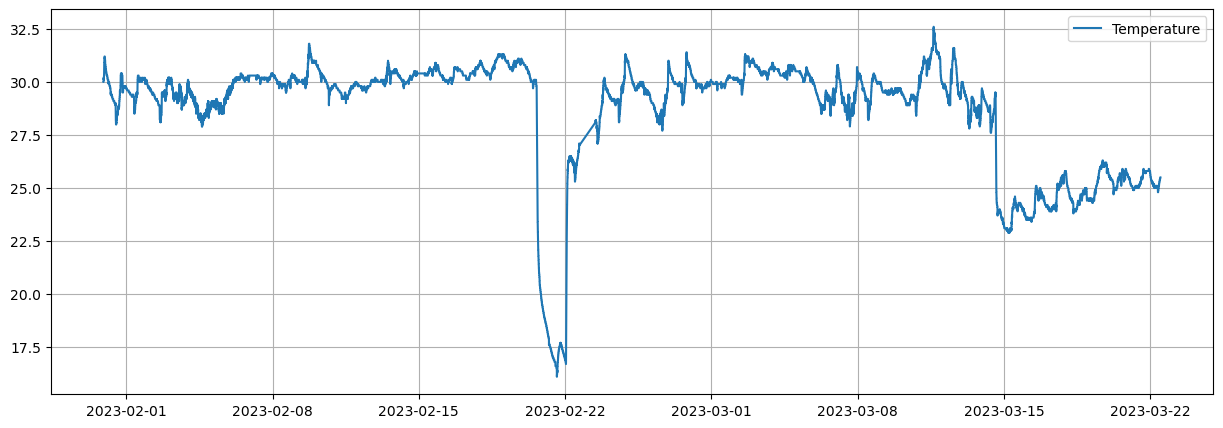

In [75]:
plt.figure(figsize=(15,5))
plt.plot(datetime2, sensor2.temp, label='Temperature')
plt.grid(True)
plt.legend() 
plt.show()

Testing data-set is taken from where the second device seemd to be turned off and then on again. Meaning from the 22nd of Feb until 14th of March as show next:

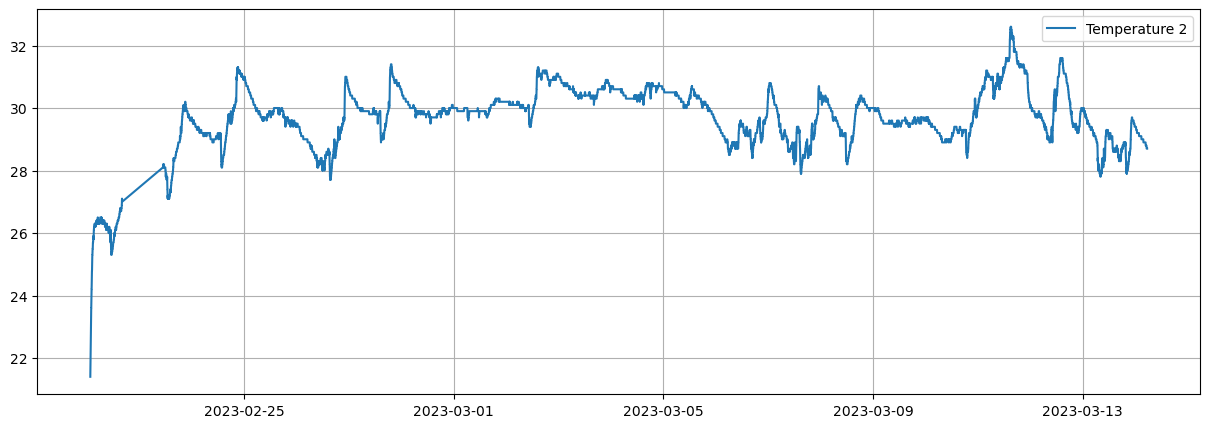

In [76]:
plt.figure(figsize=(15,5))
plt.plot(wave_oc2_datetime, wave_oc2.temp, label='Temperature 2')
plt.grid(True)
plt.legend() 
plt.show()


In [77]:
# cleaning data before testing

wave_oc2 = wave_oc2.drop(columns=[
    'deploymentGroupId', 'tsmEv', 'tsmGw', 'tsmId', 'tsmTs', 'tsmTuid', 'Unnamed: 7',
    'deploymentGroupId.1', 'tsmEv.1', 'tsmGw.1', 'tsmId.1', 'tsmTs.1', 'tsmTuid.1', 'Unnamed: 17',
    'deploymentGroupId.2', 'tsmEv.2', 'tsmGw.2', 'tsmId.2', 'tsmTuid.2', 'Unnamed: 28',
    'deploymentGroupId.3', 'tsmEv.3', 'tsmGw.3', 'tsmId.3', 'tsmTuid.3',
    'batl','accx','accy', 'accz','activityLevel','histogram0', 'histogram1', 'histogram2',
    'histogram3', 'histogram4', 'histogram5', 'histogram6', 'energyLevel', 
    'airp', 'humd', 'lght', 'tsmTs.3'
])

In [78]:
wave_oc2

,temp,tsmTs.2
31953,21.4,1677030068
31954,21.5,1677030128
31955,21.7,1677030188
31956,21.8,1677030248
31957,21.9,1677030308
...,...,...
59912,28.7,1678771729
59913,28.7,1678771789
59914,28.7,1678771849
59915,28.7,1678771909


In [79]:
wave_oc2['temp_at_start'] = wave_oc2.iloc[0].temp
wave_oc2['running_time'] = convertSec(wave_oc2['tsmTs.2'] - (wave_oc2.iloc[0]['tsmTs.2']-10))
wave_oc2_x = wave_oc2[['temp_at_start', 'running_time']]
wave_oc2_y = wave_oc2[['temp']]

# predicting temp
wave_oc2_x['predicted_temp'] = wave_oc2_x.apply(lambda x : calculate_logarithmic(
    x['running_time'], x['temp_at_start']), axis=1
                                               )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


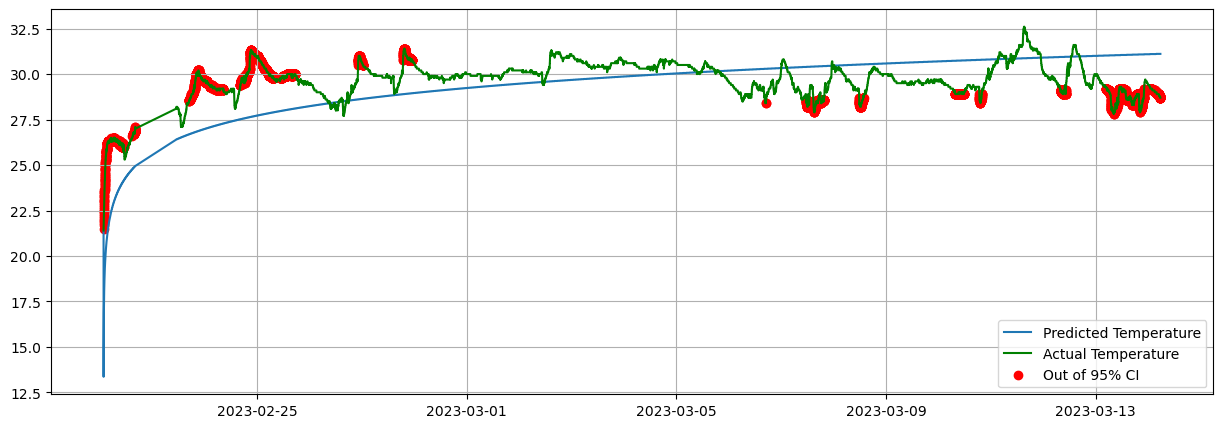

In [80]:
plt.figure(figsize=(15,5))



# plt.plot(wave_oc2_datetime, wave_oc2.temp, label='Temperature 2')

# for i in range(wave_oc2_x.shape[0]):
#     c='g'
#     if wave_oc2_x['predicted_temp'] 
#     plt.scatter(wave_oc2_datetime[i], wave_oc2.iloc[i].temp)

plt.plot(wave_oc2_datetime,  wave_oc2_x['predicted_temp'], label="Predicted Temperature")
plt.plot(wave_oc2_datetime, wave_oc2.temp, label="Actual Temperature", c='g')

out_of_stdev = np.where(abs(wave_oc2.temp - wave_oc2_x['predicted_temp']) >= 2 * 0.91)
out_of_stdev_datetime = [datetime.datetime.fromtimestamp(x) for x in wave_oc2.iloc[out_of_stdev]['tsmTs.2']]

plt.scatter(out_of_stdev_datetime, wave_oc2.iloc[out_of_stdev].temp, c='r', label="Out of 95% CI" )


plt.grid(True)
plt.legend() 
plt.show()

# MSE testing device-two

In [81]:
(((wave_oc2_x['predicted_temp'] - wave_oc2_y['temp']) **2).sum()) / wave_oc2_x.shape[0]

1.995271005578601